In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency

df = pd.read_excel(r'C:\Users\Moulali\Downloads\aspiring_minds_employability_outcomes_2015.xlsx')

#head of the dataset
print(df.head())

#shape of the dataset
print(df.shape)

#description of the dataset
print(df.describe())

  Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1         

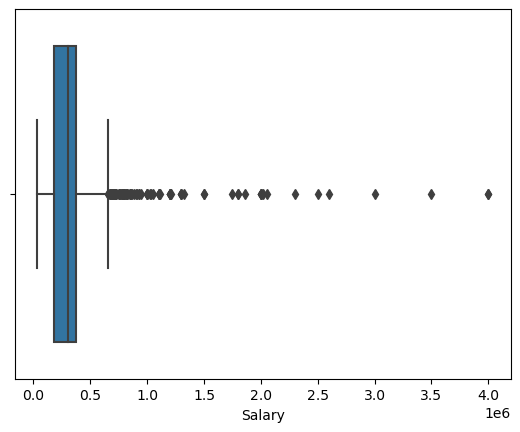

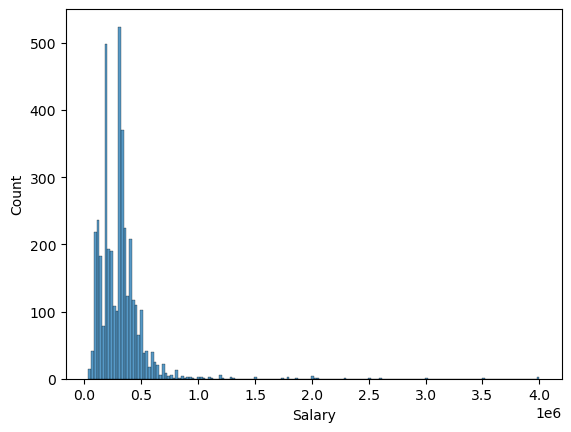

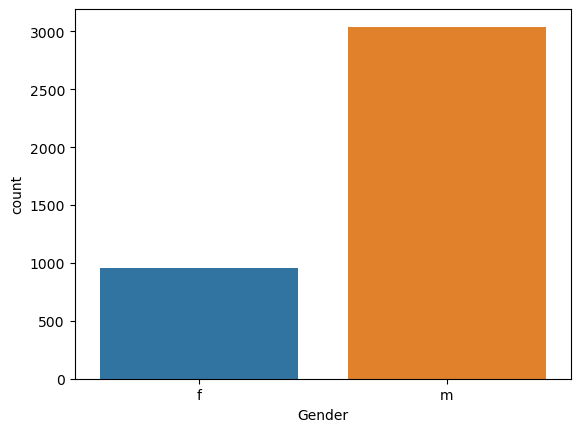

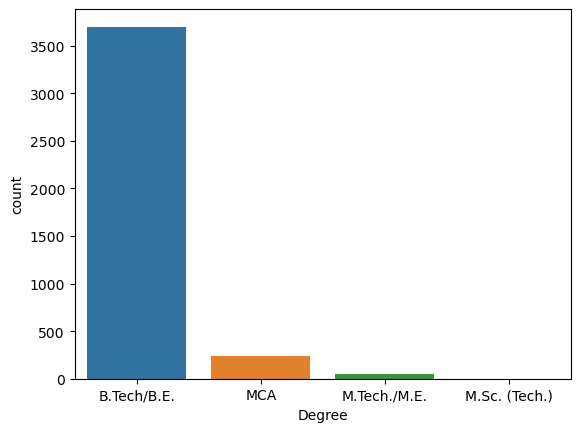

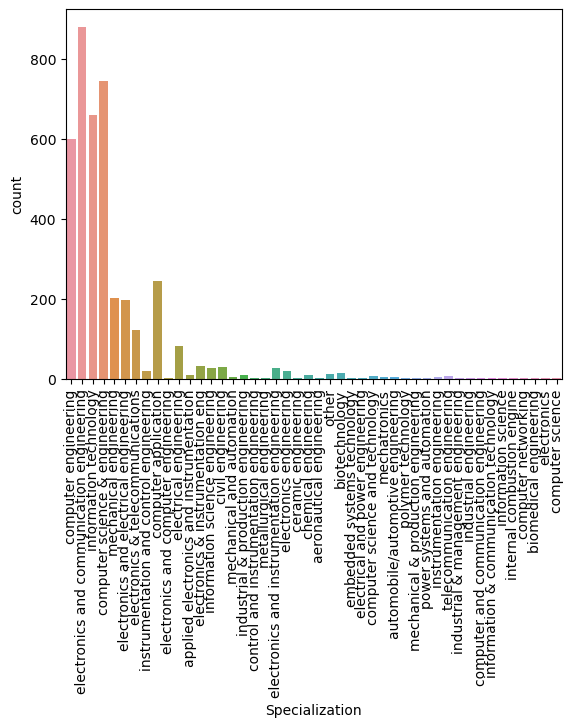

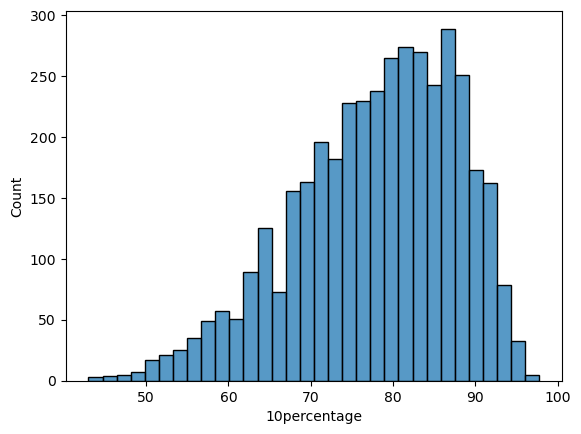

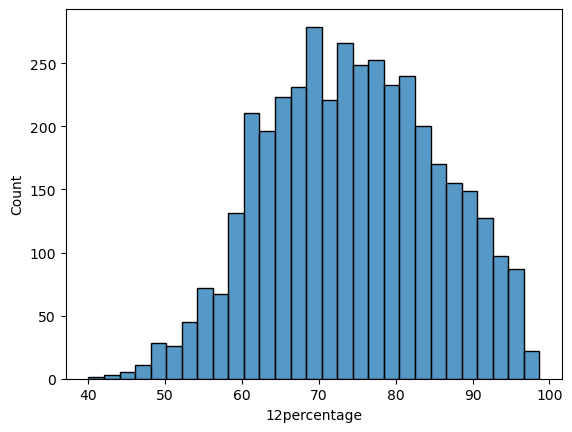

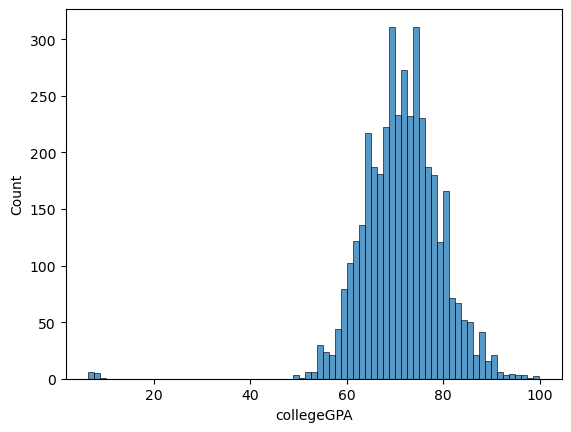

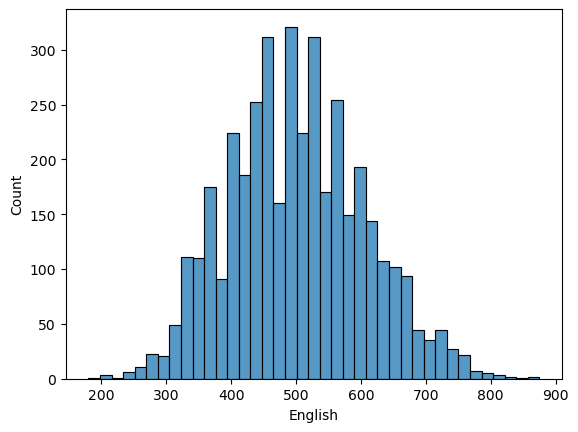

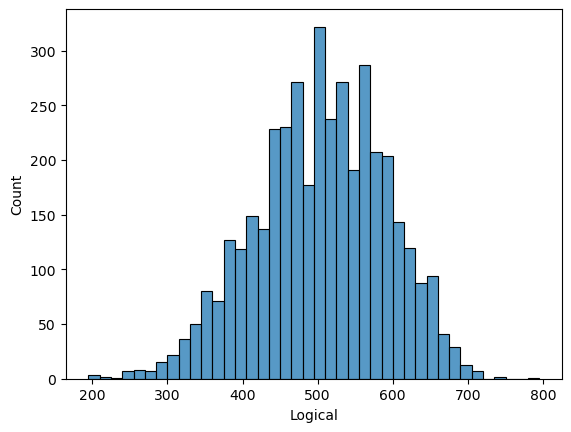

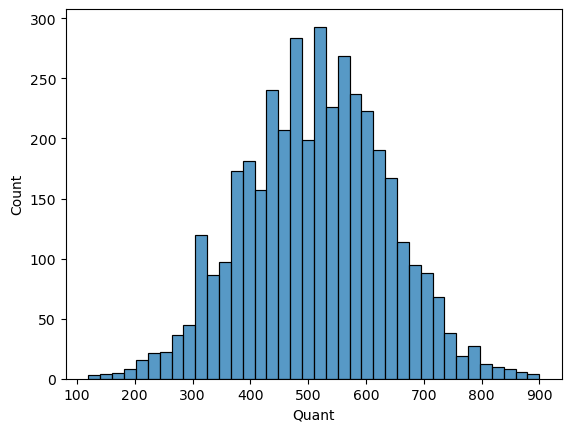

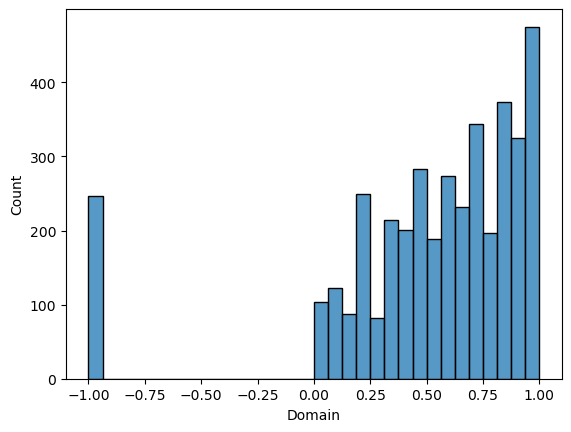

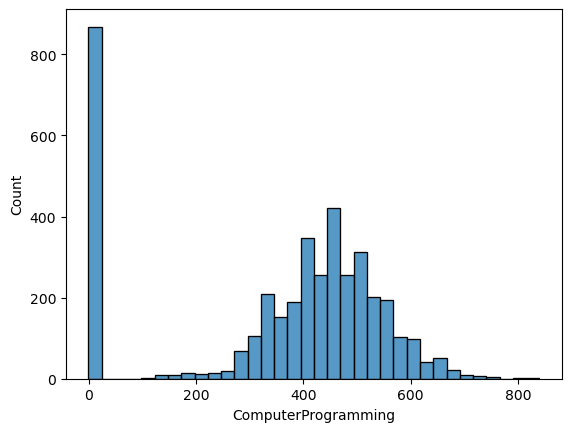

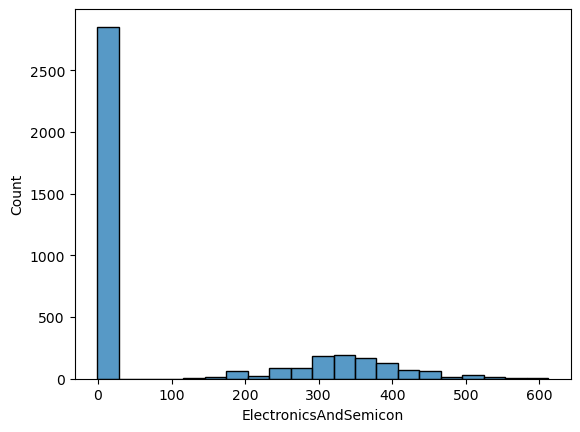

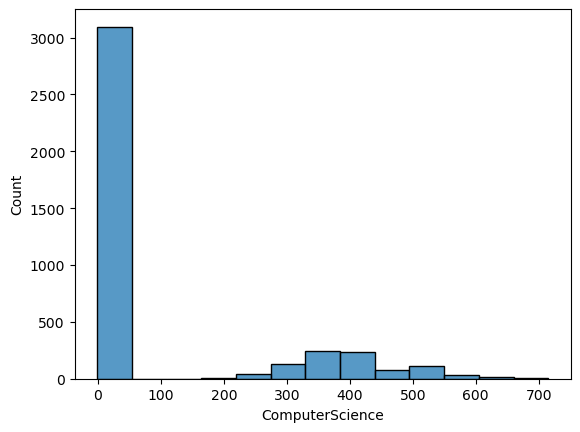

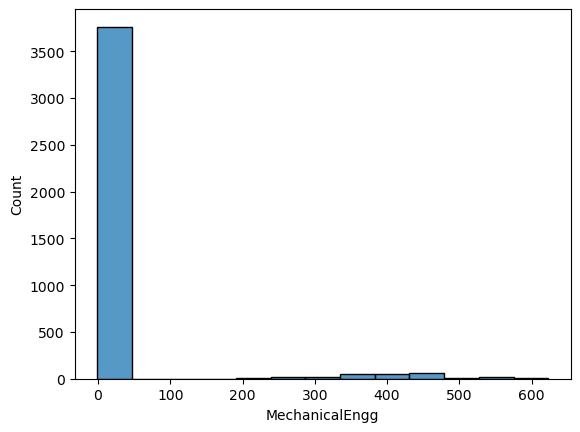

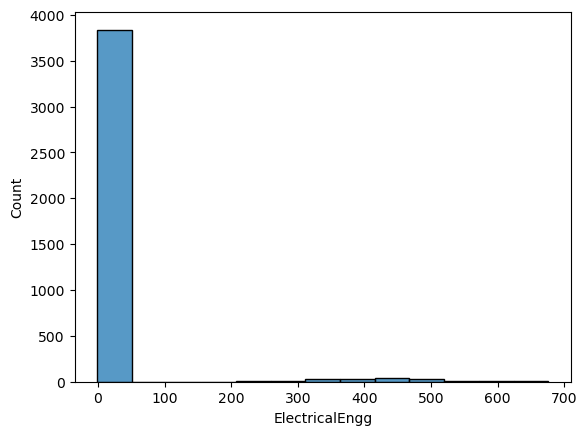

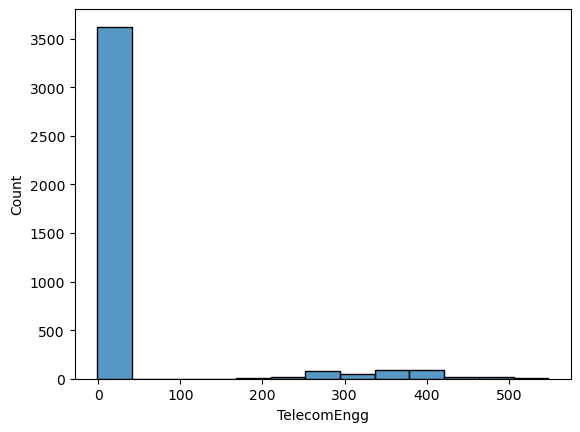

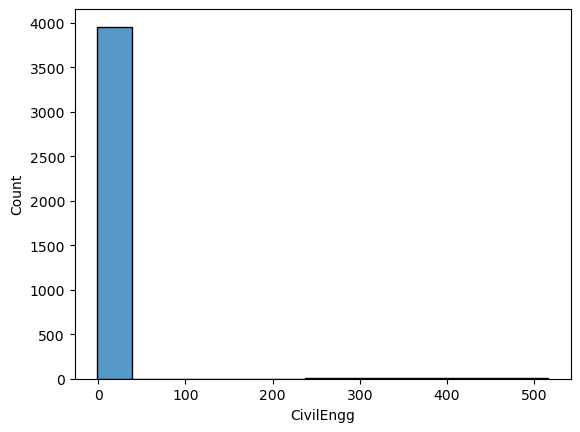

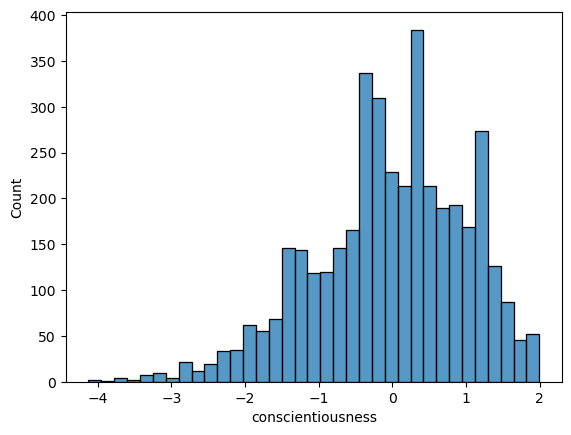

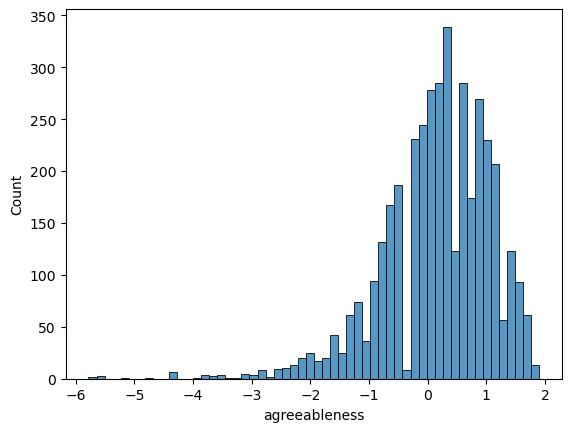

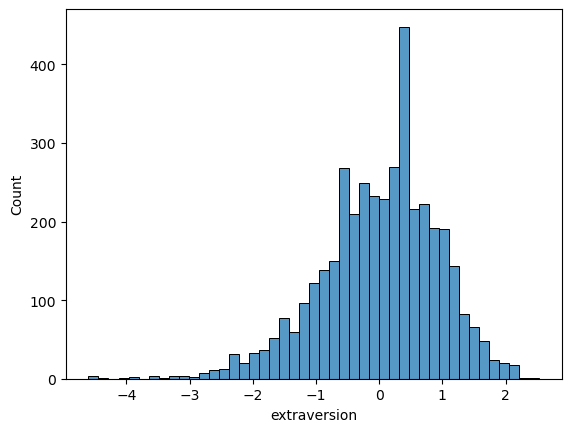

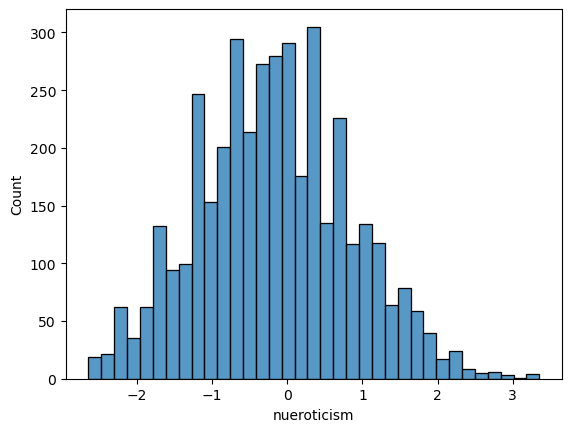

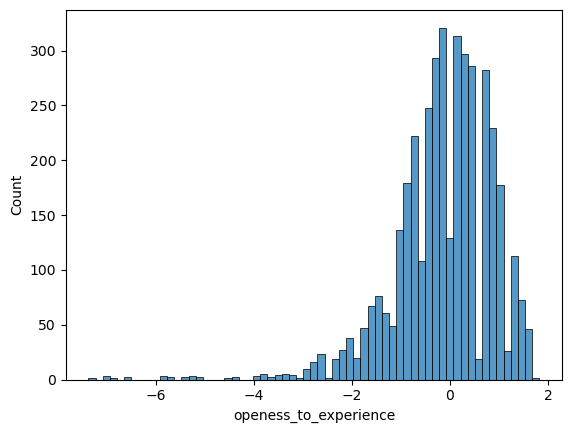

In [51]:

#boxplot for the Salary column to identify outliers
sns.boxplot(x=df['Salary'])
plt.show()

#histogram for the Salary column to understand its distribution
sns.histplot(x=df['Salary'])
plt.show()

#countplots for the categorical variables to understand their frequency distribution
sns.countplot(x=df['Gender'])
plt.show()

sns.countplot(x=df['Degree'])
plt.show()

sns.countplot(x=df['Specialization'])
plt.xticks(rotation=90)
plt.show()

#histograms for the numerical columns to understand their probability distribution
sns.histplot(x=df['10percentage'])
plt.show()

sns.histplot(x=df['12percentage'])
plt.show()

sns.histplot(x=df['collegeGPA'])
plt.show()

sns.histplot(x=df['English'])
plt.show()

sns.histplot(x=df['Logical'])
plt.show()

sns.histplot(x=df['Quant'])
plt.show()

sns.histplot(x=df['Domain'])
plt.show()

sns.histplot(x=df['ComputerProgramming'])
plt.show()

sns.histplot(x=df['ElectronicsAndSemicon'])
plt.show()

sns.histplot(x=df['ComputerScience'])
plt.show()

sns.histplot(x=df['MechanicalEngg'])
plt.show()

sns.histplot(x=df['ElectricalEngg'])
plt.show()

sns.histplot(x=df['TelecomEngg'])
plt.show()

sns.histplot(x=df['CivilEngg'])
plt.show()

sns.histplot(x=df['conscientiousness'])
plt.show()

sns.histplot(x=df['agreeableness'])
plt.show()

sns.histplot(x=df['extraversion'])
plt.show()

sns.histplot(x=df['nueroticism'])
plt.show()

sns.histplot(x=df['openess_to_experience'])
plt.show()


<Axes: ylabel='Frequency'>

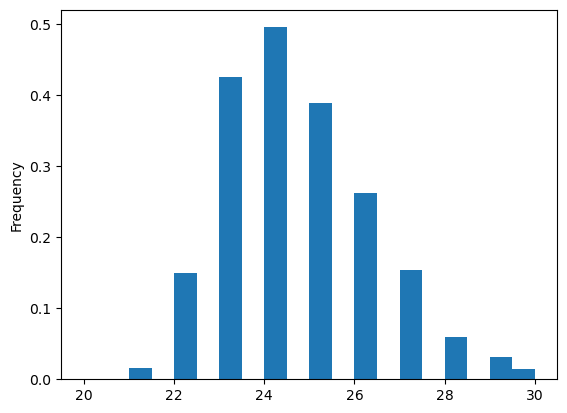

In [35]:
data=df

# Drop columns with too many missing values
data.dropna(thresh=600, axis=1, inplace=True)

# Convert the Date of Birth column to a datetime dtype
data["DOB"] = pd.to_datetime(data["DOB"])

# Calculate the age of each candidate as of January 1, 2016
jan_1_2016 = pd.to_datetime("2016-01-01")
data["age"] = (jan_1_2016 - data["DOB"]).astype('timedelta64[Y]')

# Drop the original DOB column
data.drop("DOB", axis=1, inplace=True)

# Remove outliers in the age column using the interquartile range (IQR) method
q1, q3 = np.percentile(data["age"], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data = data[(data["age"] >= lower_bound) & (data["age"] <= upper_bound)]

# Plot the distribution of the age column
data["age"].plot(kind="hist", bins=20, density=True)


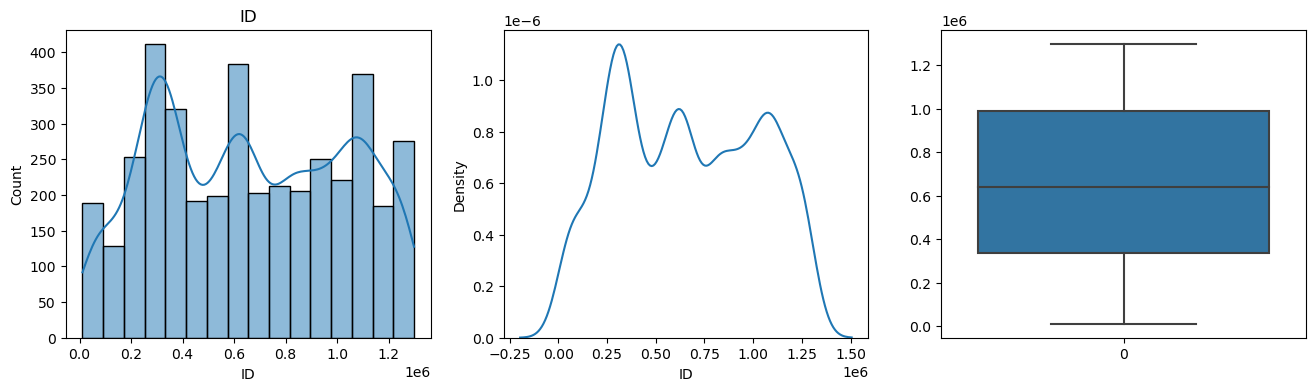

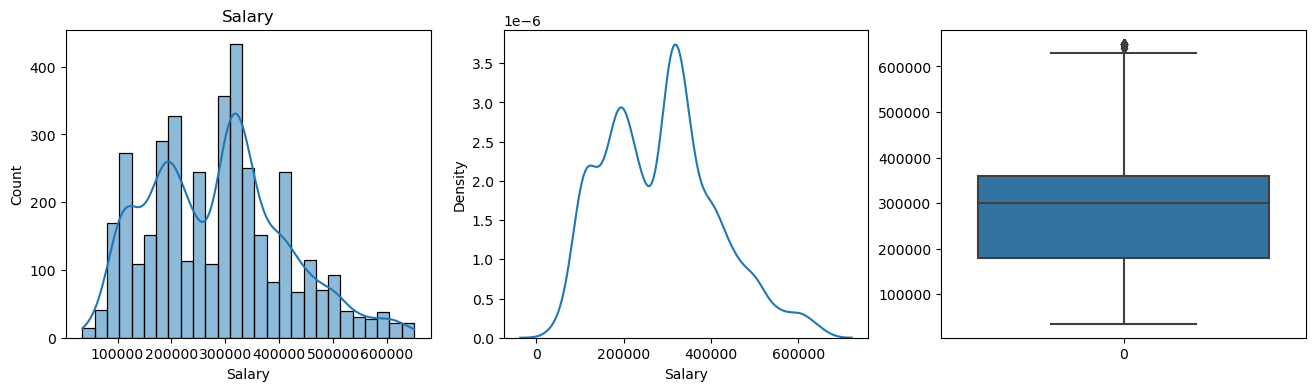

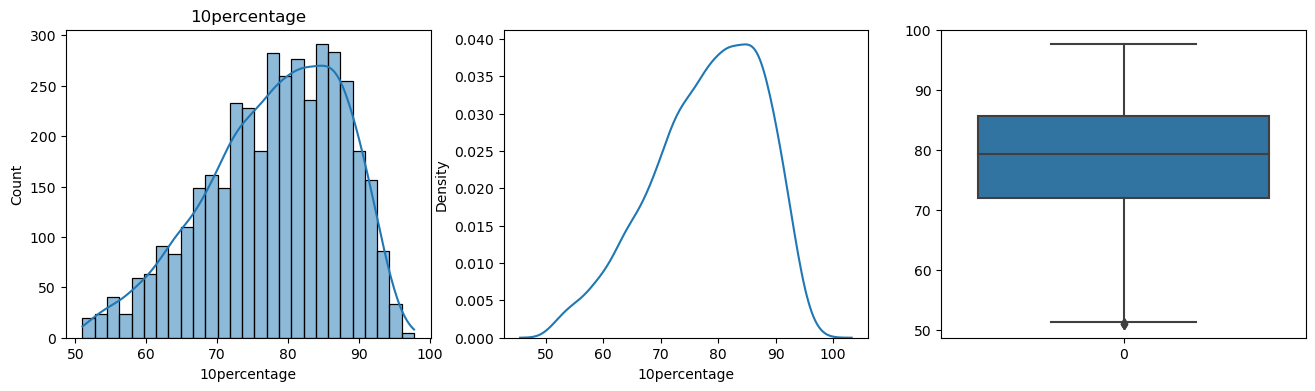

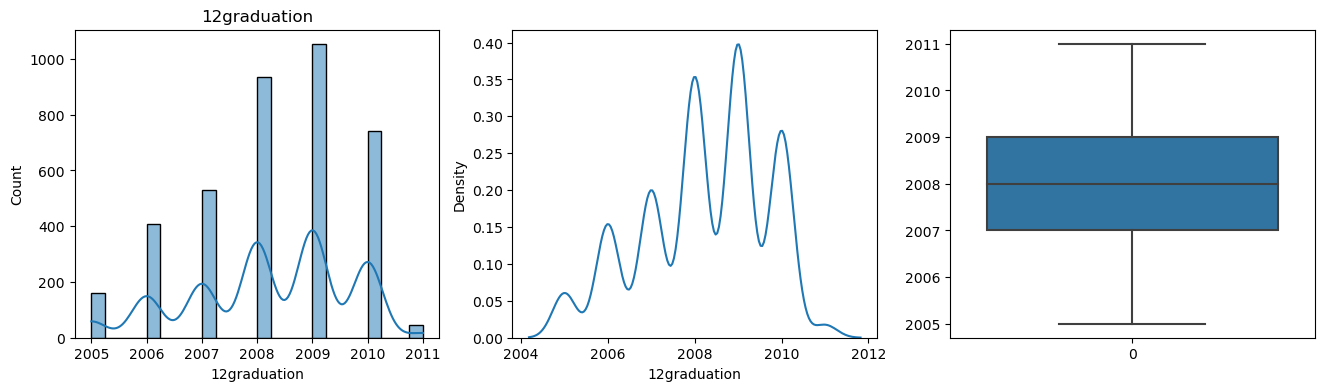

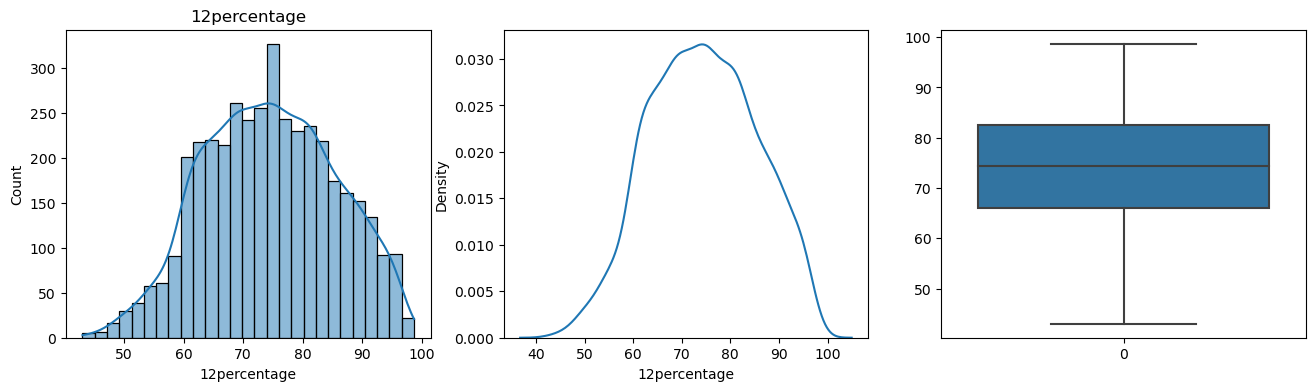

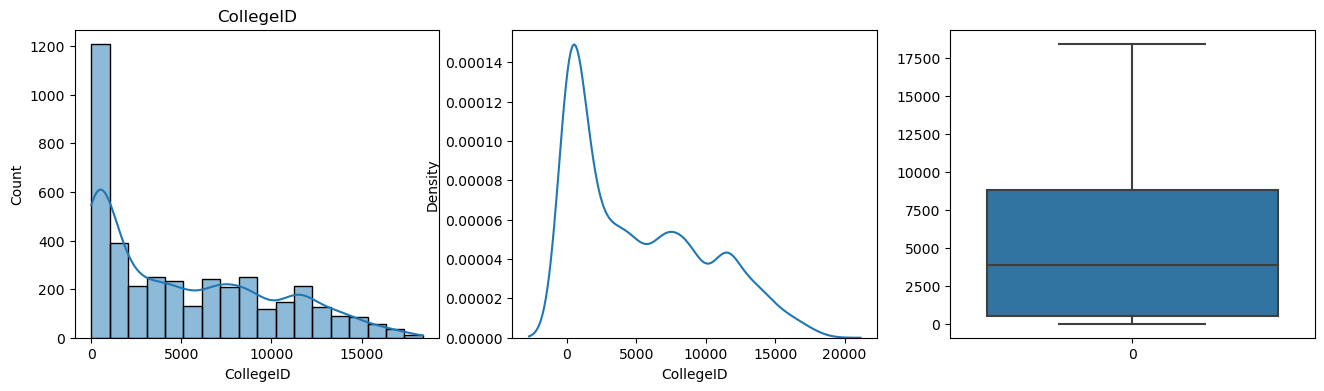

C:\Users\Moulali\AppData\Local\Temp\ipykernel_8952\713846898.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_clean[col], ax=axs[1])


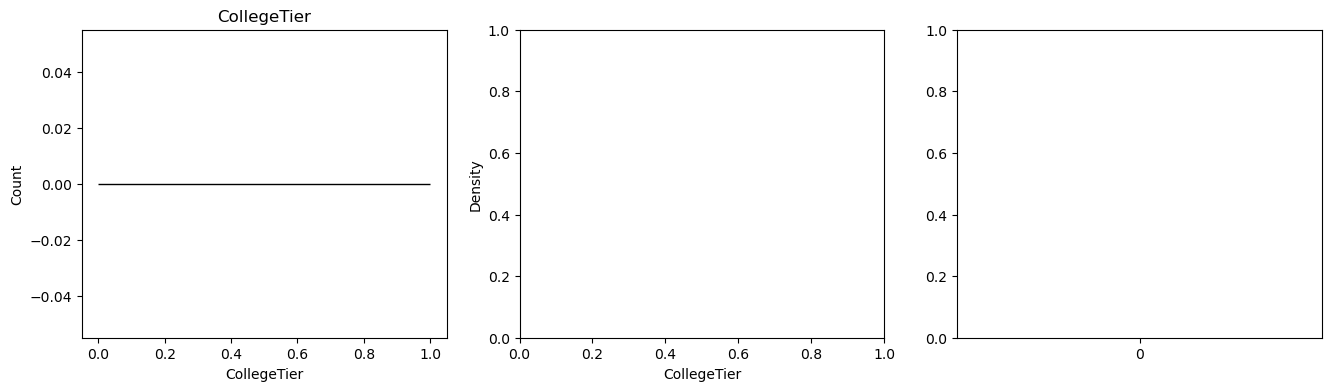

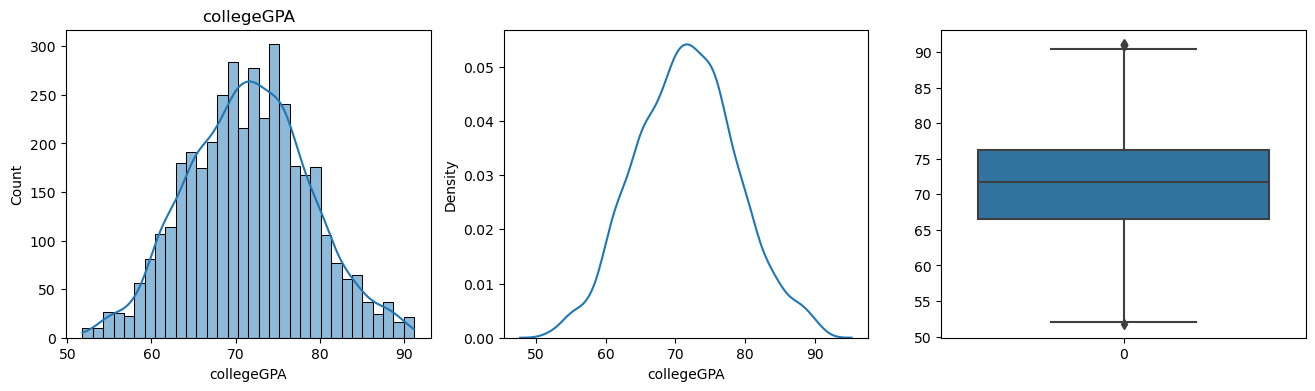

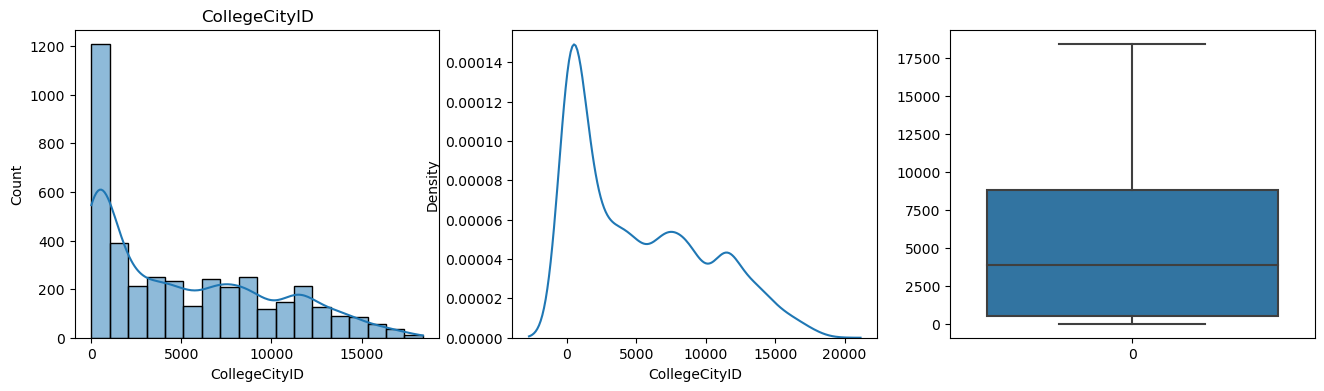

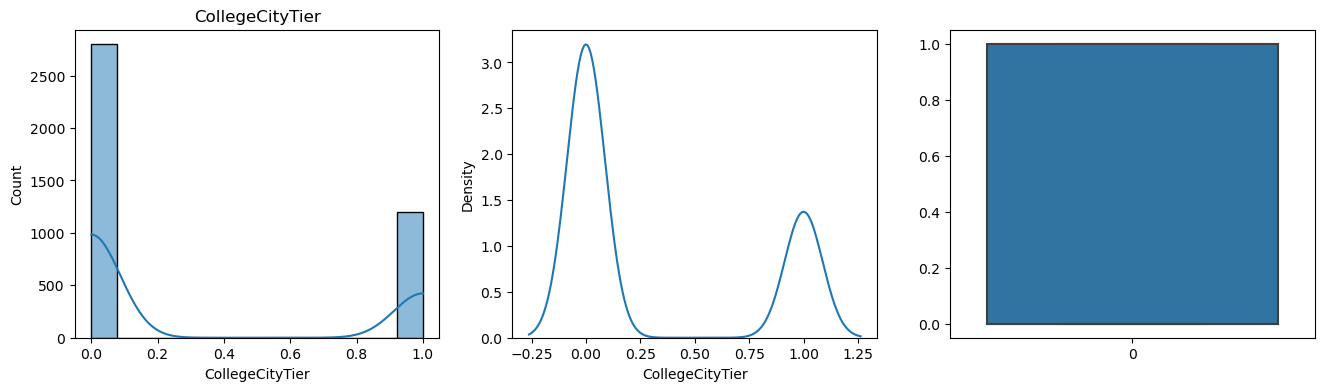

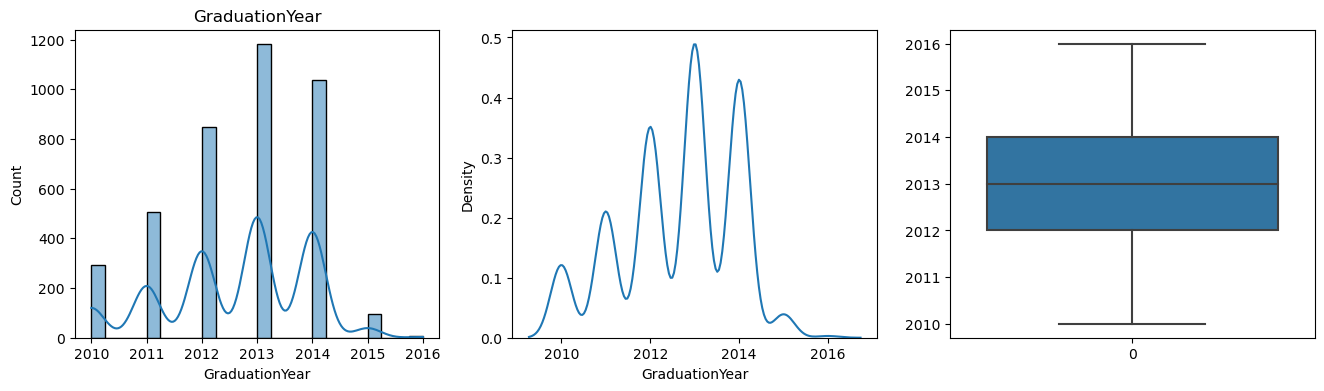

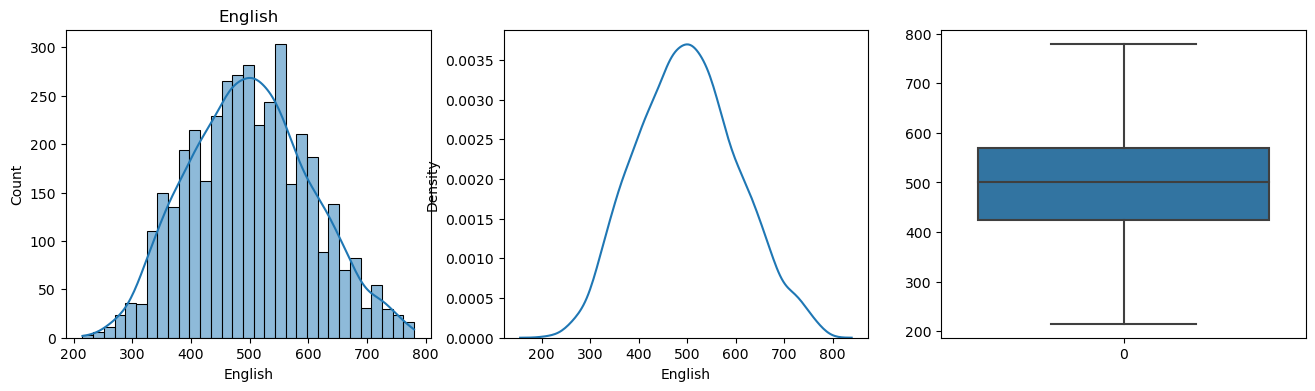

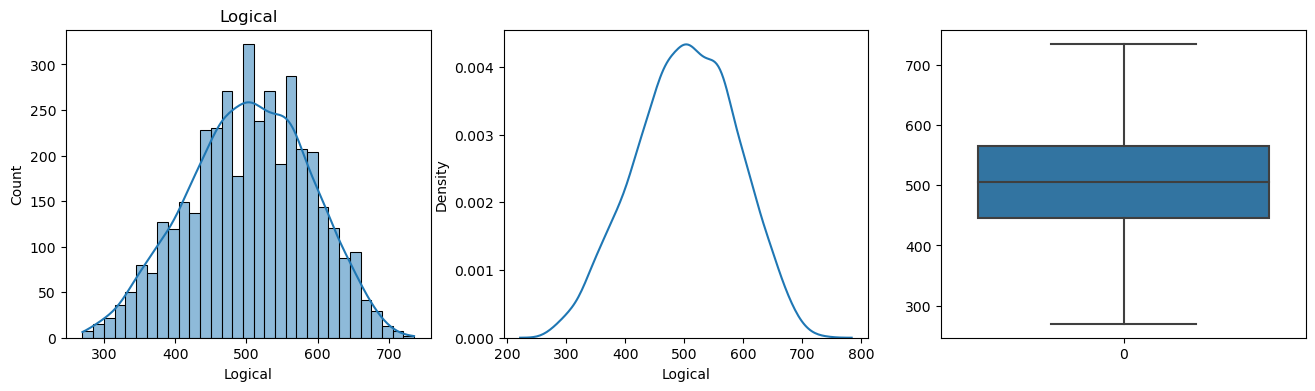

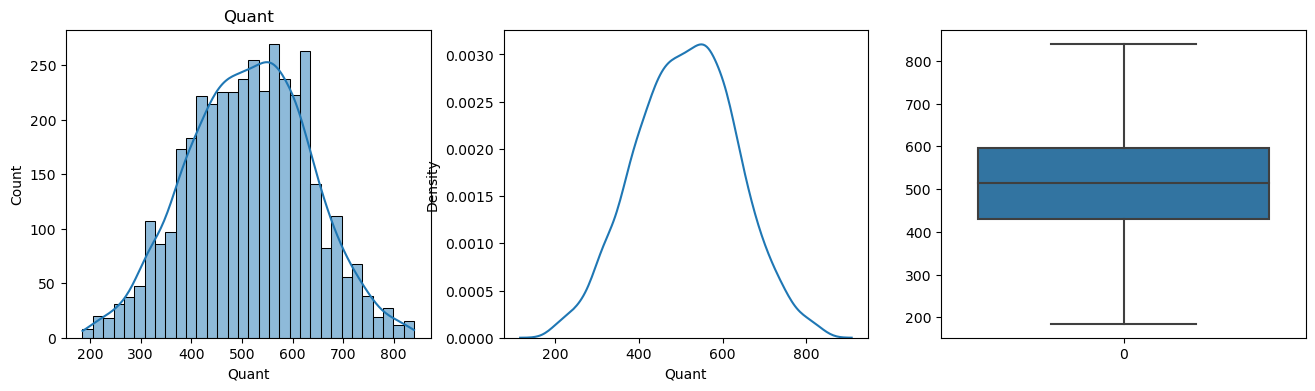

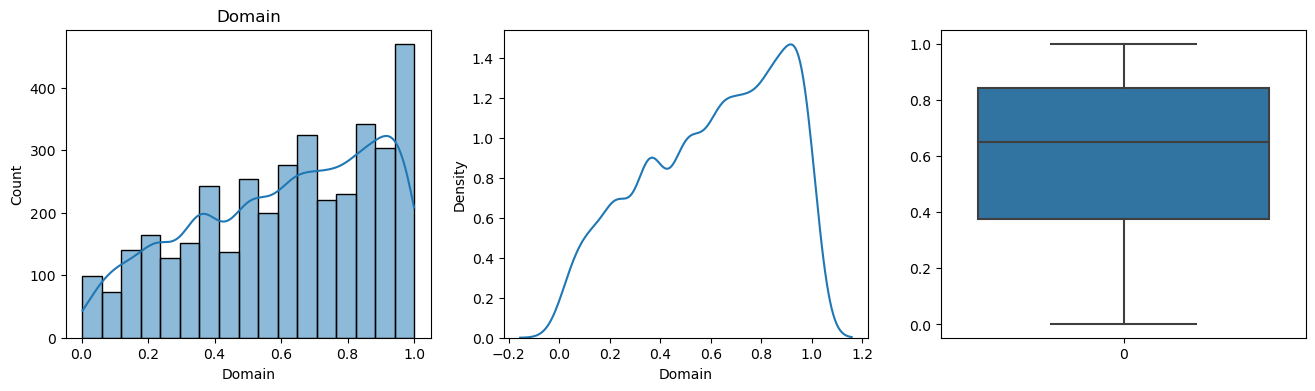

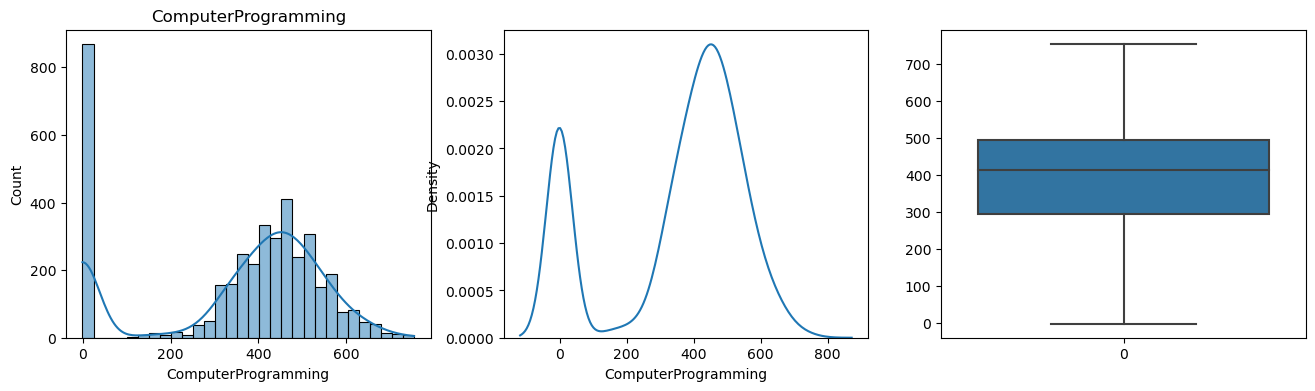

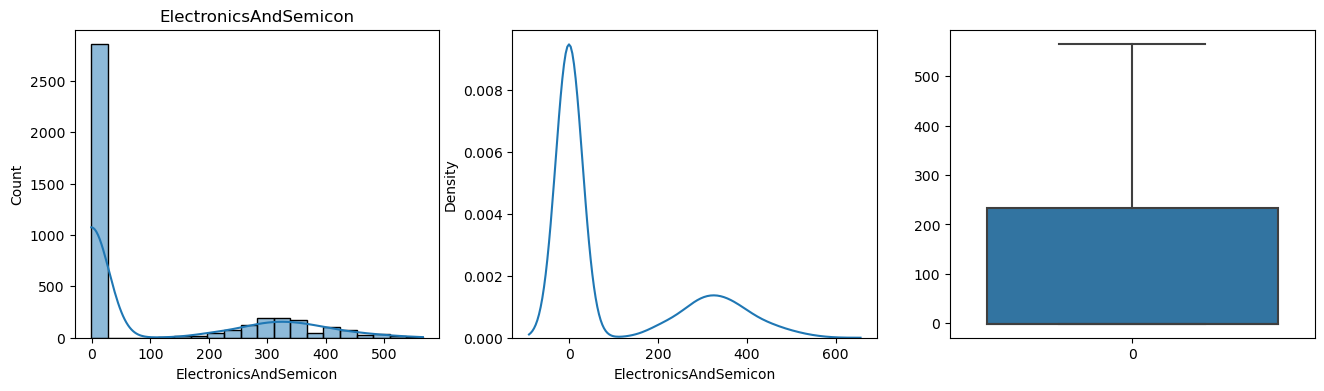

C:\Users\Moulali\AppData\Local\Temp\ipykernel_8952\713846898.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_clean[col], ax=axs[1])


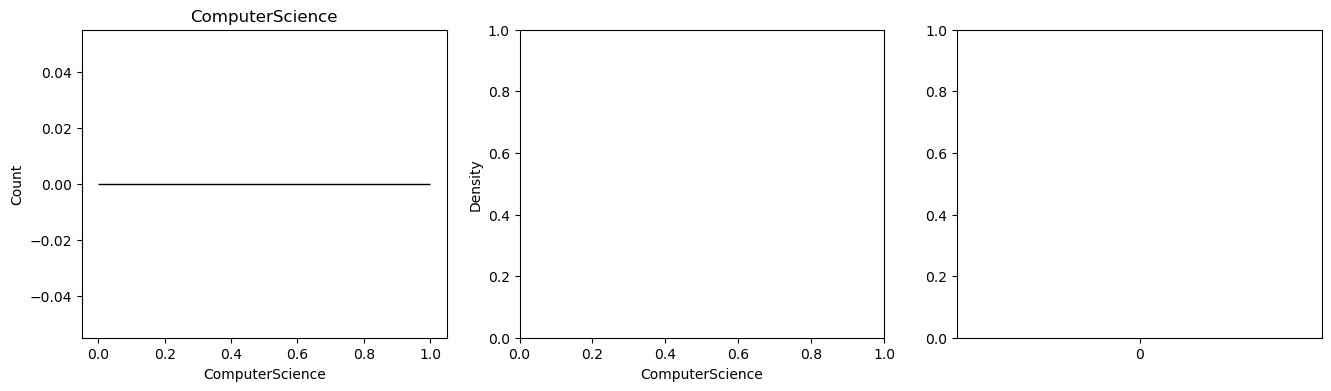

C:\Users\Moulali\AppData\Local\Temp\ipykernel_8952\713846898.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_clean[col], ax=axs[1])


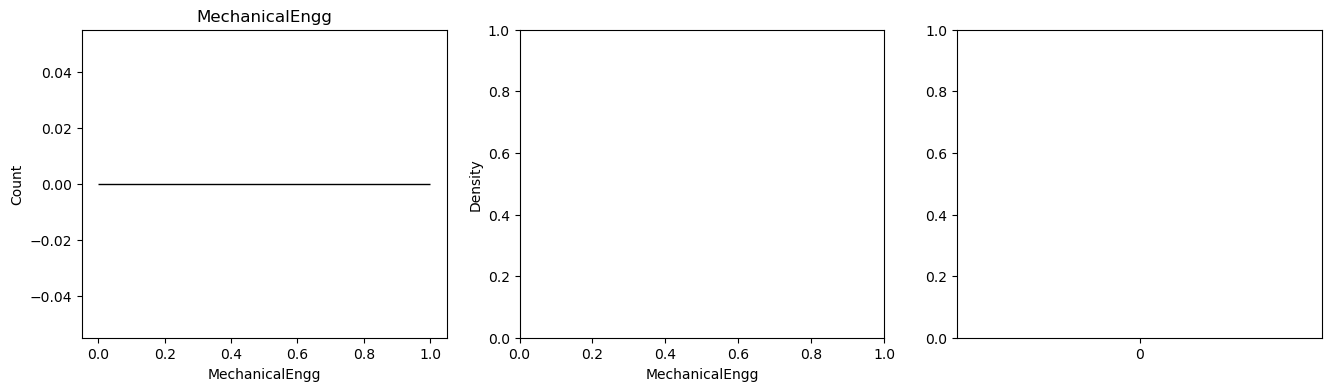

C:\Users\Moulali\AppData\Local\Temp\ipykernel_8952\713846898.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_clean[col], ax=axs[1])


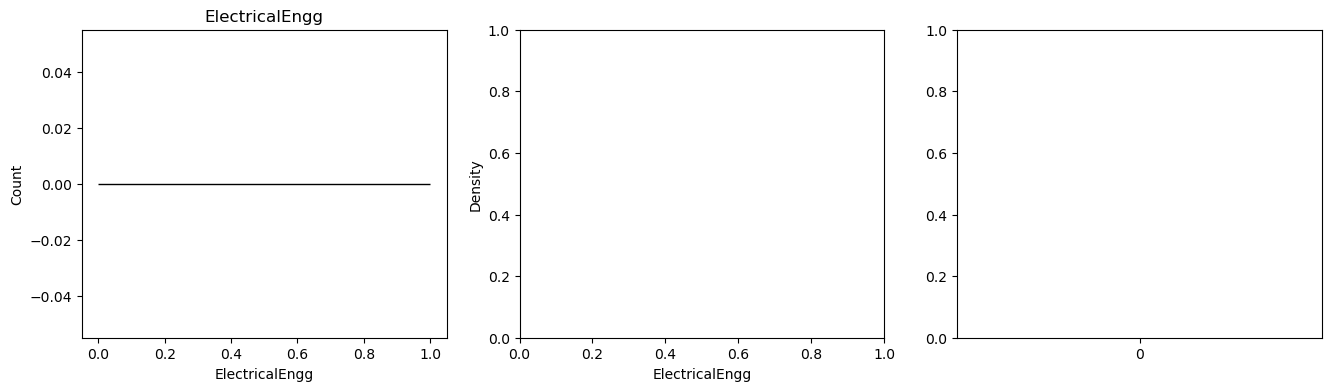

C:\Users\Moulali\AppData\Local\Temp\ipykernel_8952\713846898.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_clean[col], ax=axs[1])


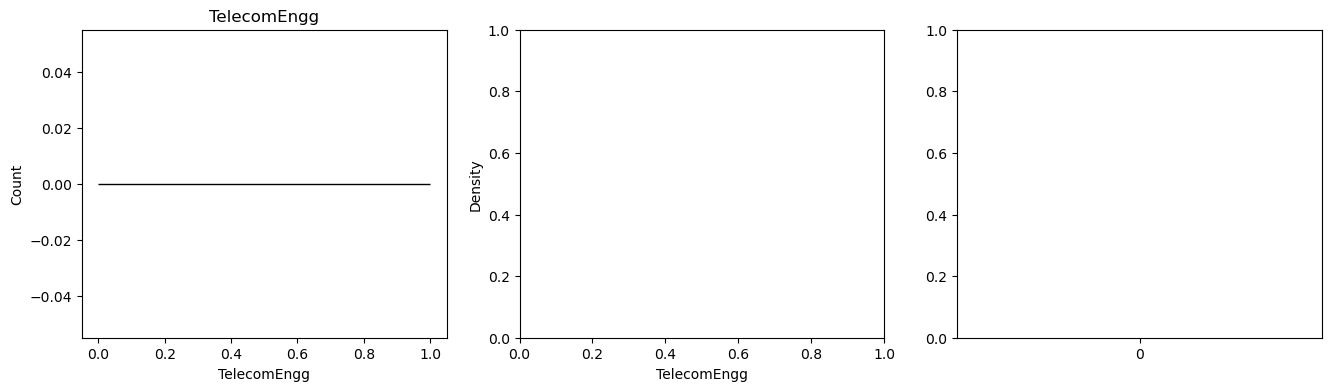

C:\Users\Moulali\AppData\Local\Temp\ipykernel_8952\713846898.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_clean[col], ax=axs[1])


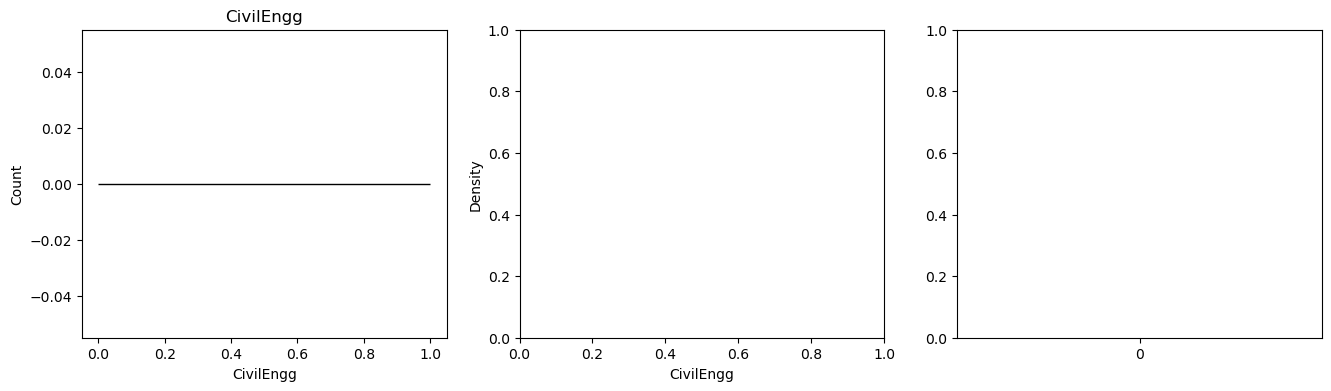

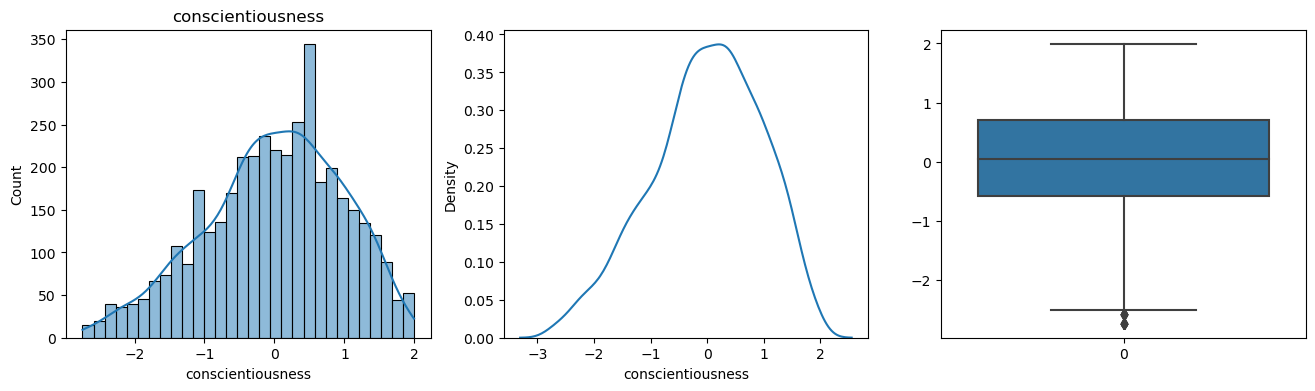

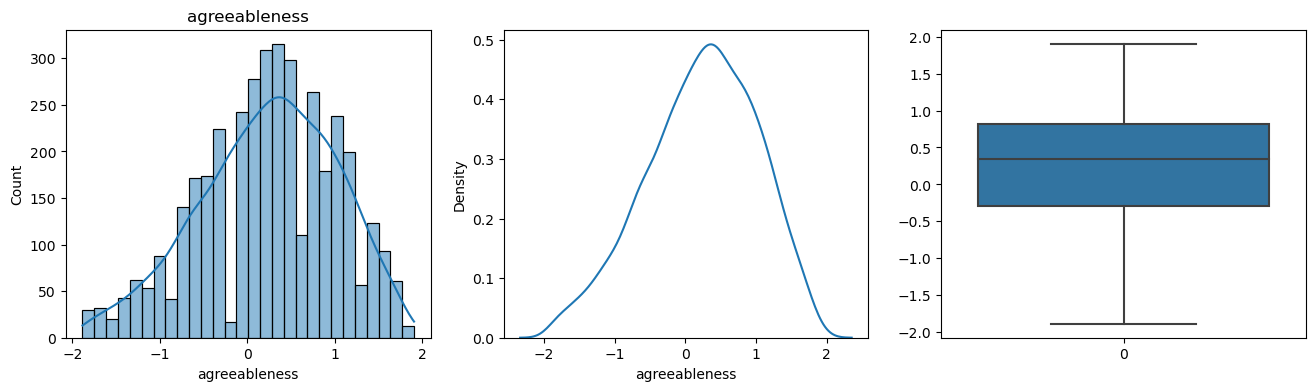

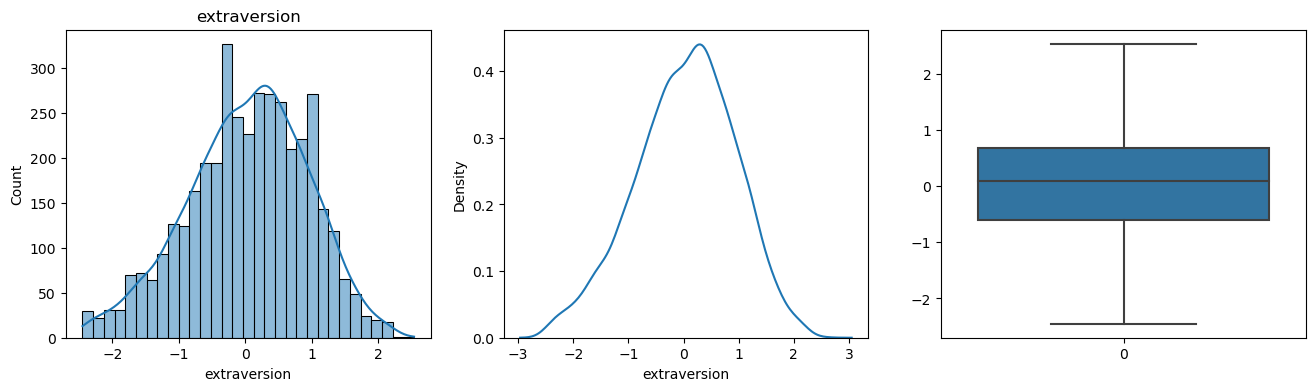

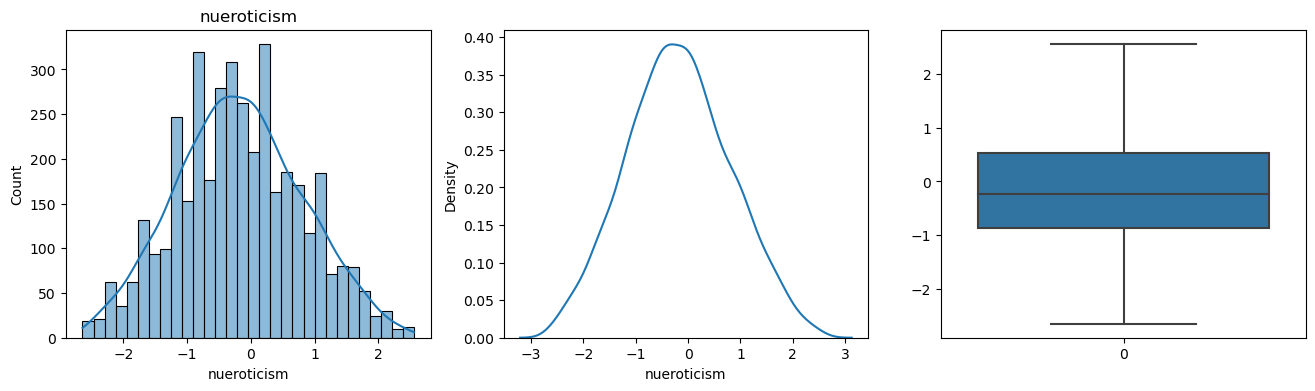

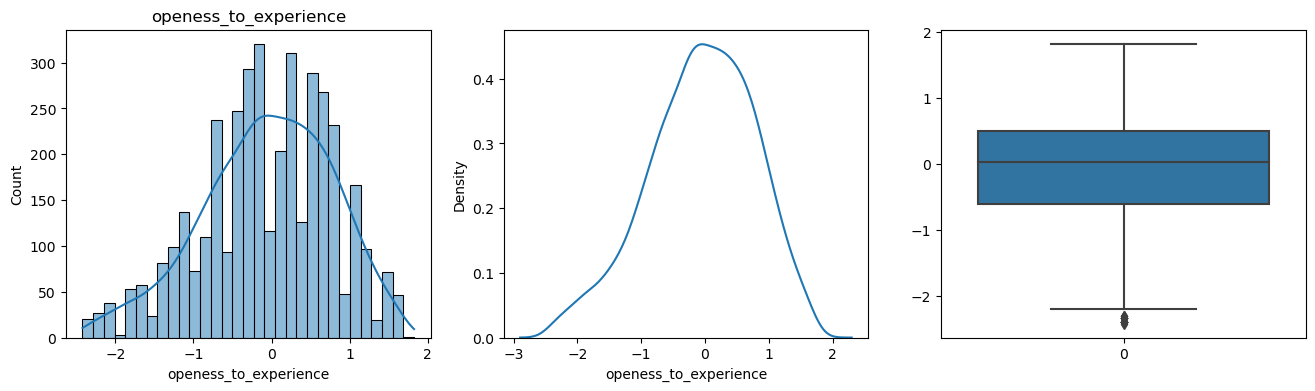

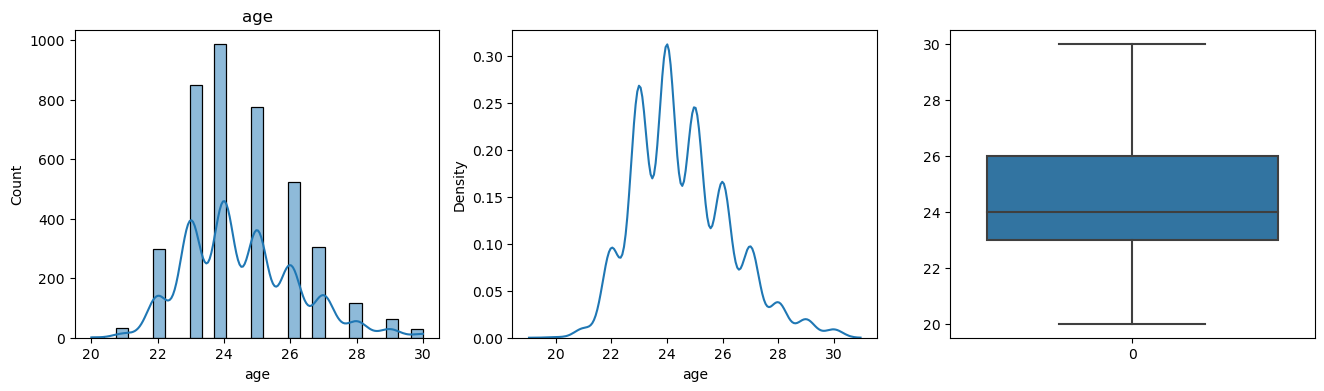

In [36]:
# Remove outliers from numerical columns
df_clean = df.copy()

# Define function to remove outliers using IQR
def remove_outliers_iqr(column):
    q1, q3 = column.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return column[(column > lower_bound) & (column < upper_bound)]

# Apply function to numerical columns
num_cols = df_clean.select_dtypes(include='number').columns.tolist()
for col in num_cols:
    df_clean[col] = remove_outliers_iqr(df_clean[col])

# Plot PDF, Histogram, and Boxplot after removing outliers
for col in num_cols:
    fig, axs = plt.subplots(ncols=3, figsize=(16,4))
    sns.histplot(df_clean[col], kde=True, ax=axs[0])
    axs[0].set_title(col)
    sns.kdeplot(df_clean[col], ax=axs[1])
    sns.boxplot(df_clean[col], ax=axs[2])
    plt.show()

# Plot Countplot for categorical columns
cat_cols = df_clean.select_dtypes(include='category').columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(df_clean[col])
    plt.title(col)
    plt.show()


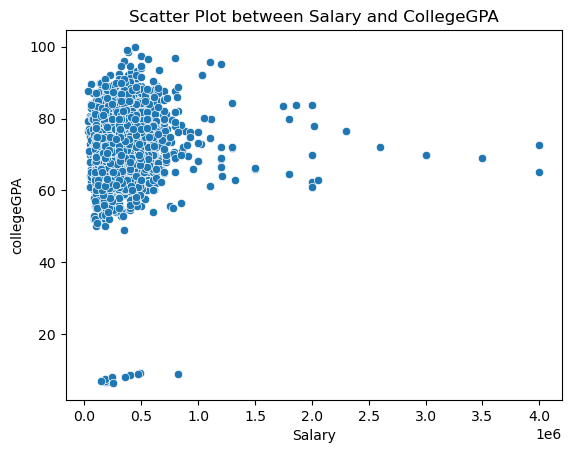

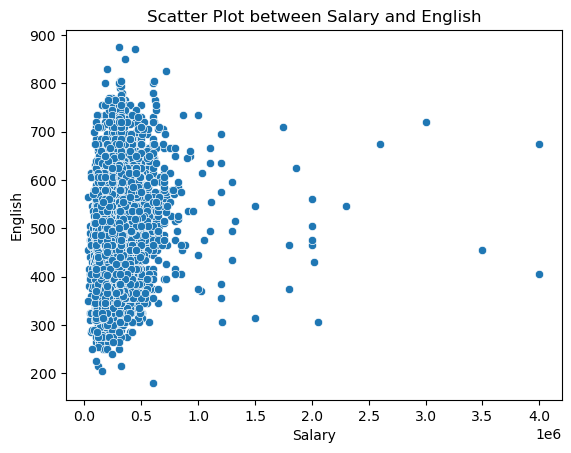

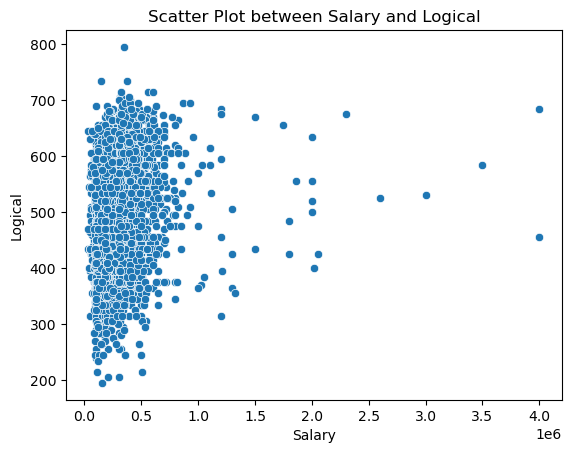

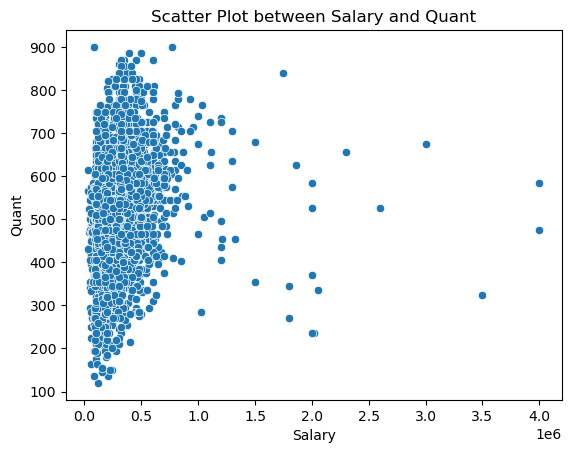

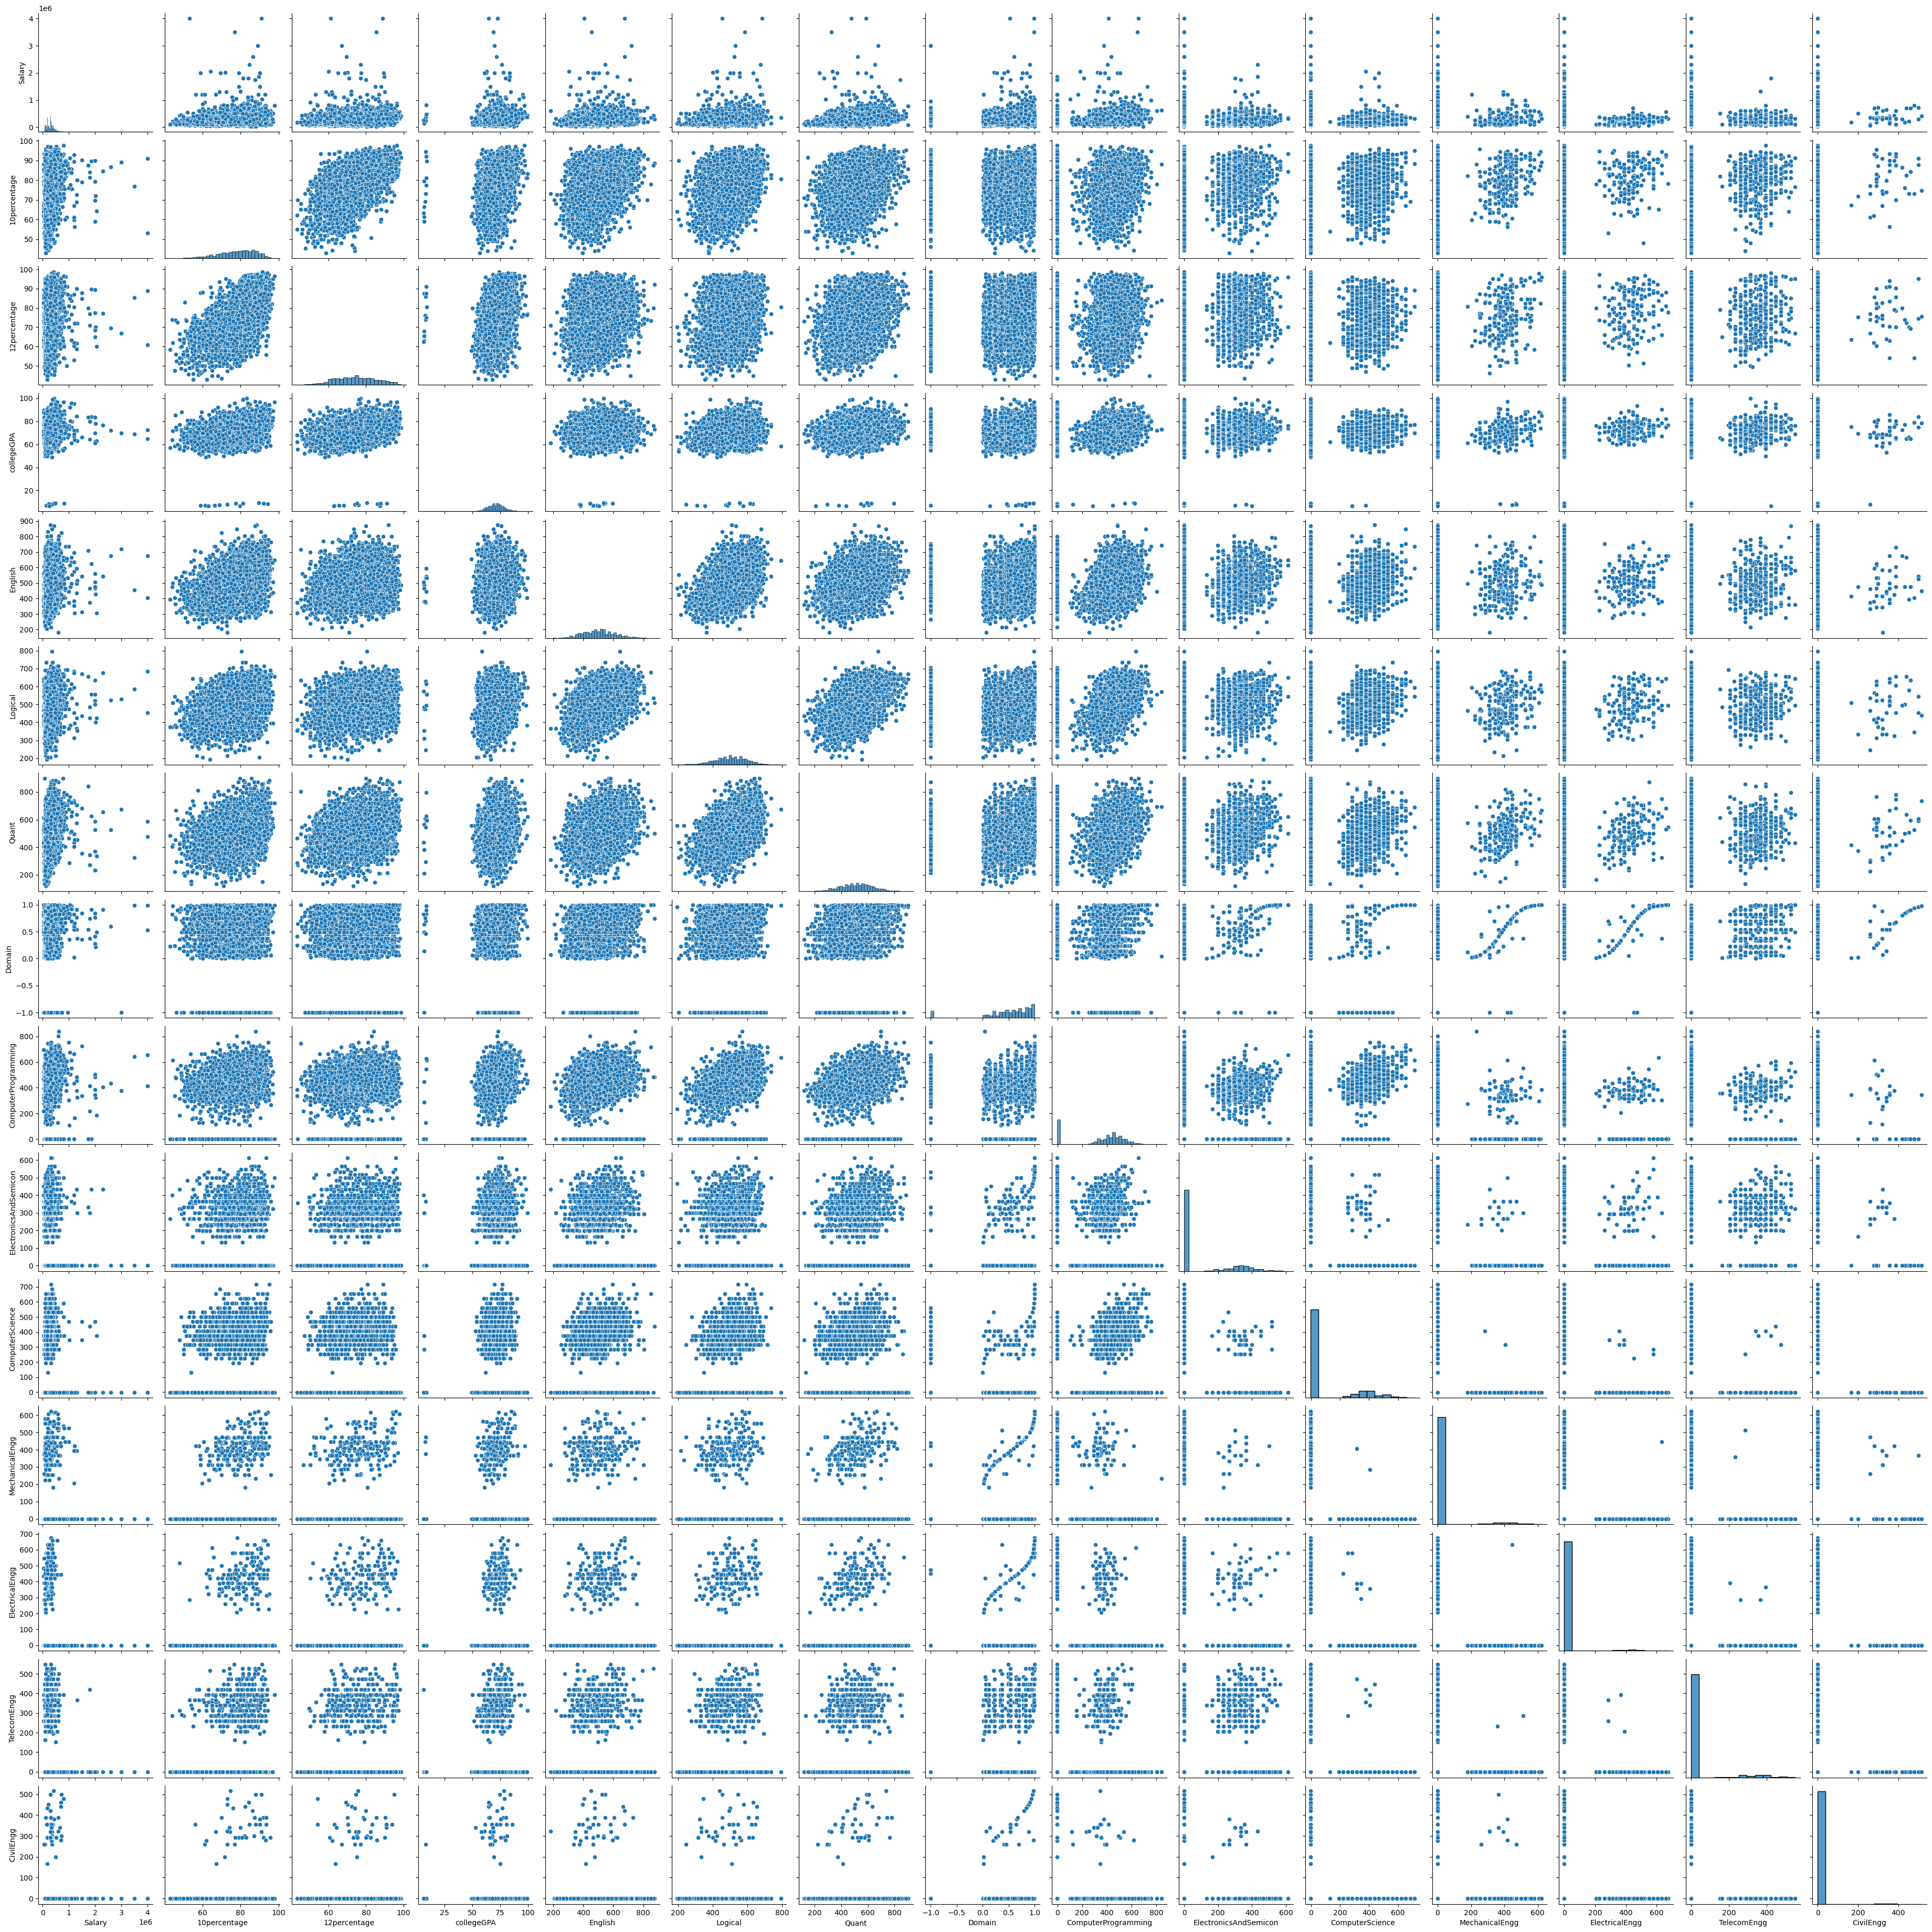

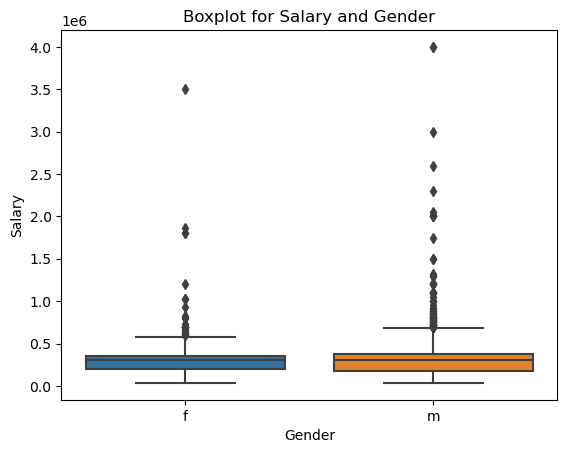

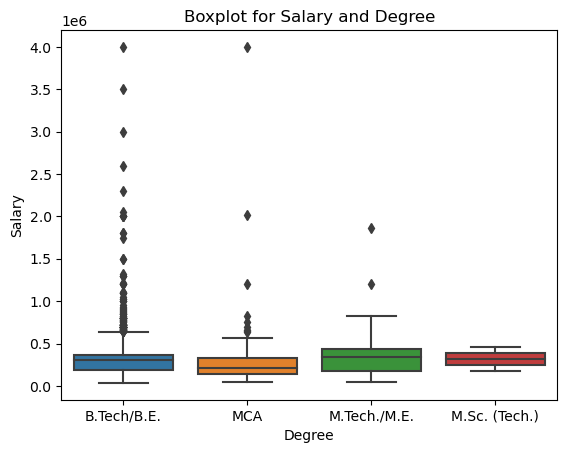

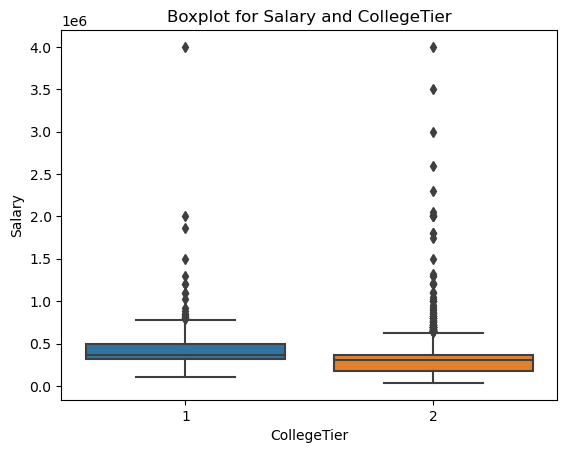

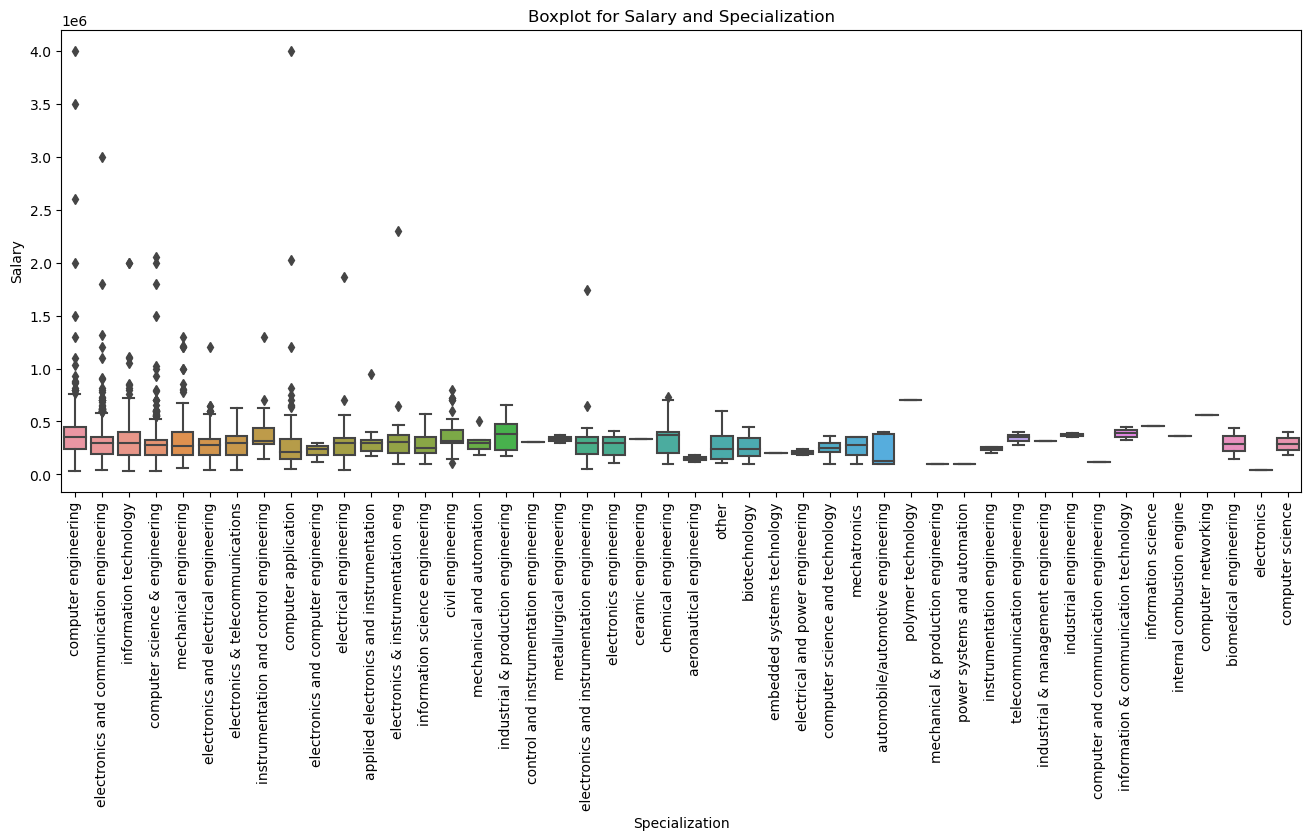

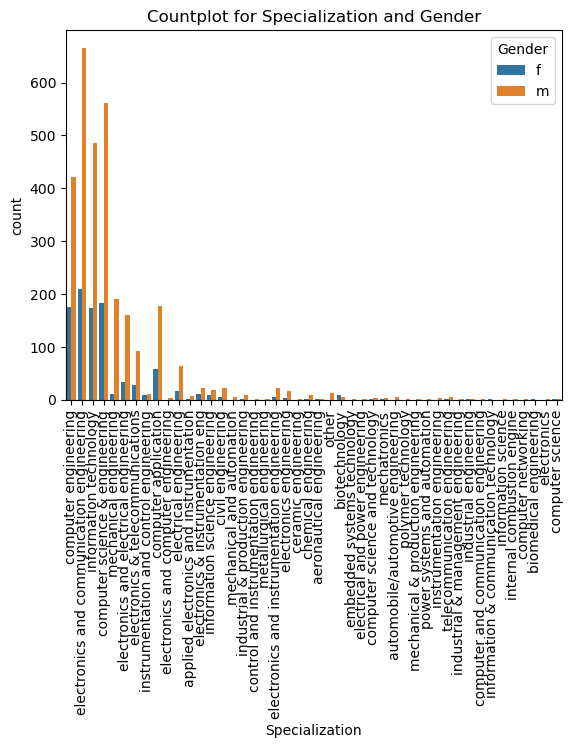

In [6]:
#Step 4 - Bivariate Analysis
#Discover the relationships between numerical columns using scatter plots, hexbin plots, pair plots, etc..
#Scatter Plot between Salary and CollegeGPA

sns.scatterplot(x='Salary', y='collegeGPA', data=data)
plt.title('Scatter Plot between Salary and CollegeGPA')
plt.show()

#Scatter Plot between Salary and English
sns.scatterplot(x='Salary', y='English', data=data)
plt.title('Scatter Plot between Salary and English')
plt.show()

#Scatter Plot between Salary and Logical
sns.scatterplot(x='Salary', y='Logical', data=data)
plt.title('Scatter Plot between Salary and Logical')
plt.show()

#Scatter Plot between Salary and Quant
sns.scatterplot(x='Salary', y='Quant', data=data)
plt.title('Scatter Plot between Salary and Quant')
plt.show()

#Pair Plot for all numerical columns
sns.pairplot(data=data, vars=['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'])
plt.show()

#Identify the patterns between categorical and numerical columns using swarmplot, boxplot, barplot, etc..
#Boxplot for Salary and Gender
sns.boxplot(x='Gender', y='Salary', data=data)
plt.title('Boxplot for Salary and Gender')
plt.show()

#Boxplot for Salary and Degree
sns.boxplot(x='Degree', y='Salary', data=data)
plt.title('Boxplot for Salary and Degree')
plt.show()

#Boxplot for Salary and CollegeTier
sns.boxplot(x='CollegeTier', y='Salary', data=data)
plt.title('Boxplot for Salary and CollegeTier')
plt.show()

#Boxplot for Salary and Specialization
plt.figure(figsize=(16,6))
sns.boxplot(x='Specialization', y='Salary', data=data)
plt.xticks(rotation=90)
plt.title('Boxplot for Salary and Specialization')
plt.show()

#Barplot for Specialization and Gender
sns.countplot(x='Specialization', hue='Gender', data=data)
plt.xticks(rotation=90)
plt.title('Countplot for Specialization and Gender')
plt.show()




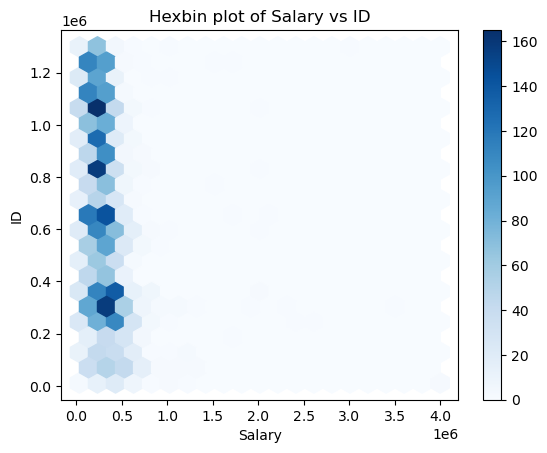

In [37]:
#relationships between numerical columns using hexbin plots
plt.hexbin(df['Salary'], df['ID'], gridsize=20, cmap='Blues')

# add a colorbar legend
plt.colorbar()

# set axis labels and plot title
plt.xlabel('Salary')
plt.ylabel('ID')
plt.title('Hexbin plot of Salary vs ID')

# display the plot
plt.show()

<Axes: xlabel='JobCity', ylabel='Salary'>

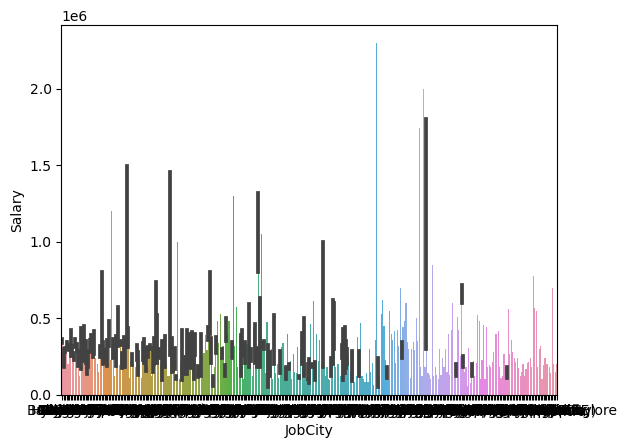

In [13]:
#categorical and numerical columns using barplot
sns.barplot(x='JobCity', y='Salary', data=df)

C:\Users\Moulali\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Moulali\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 99.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Moulali\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 99.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Moulali\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 94.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Moulali\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 95.6% of 

<Axes: xlabel='12board', ylabel='CollegeTier'>

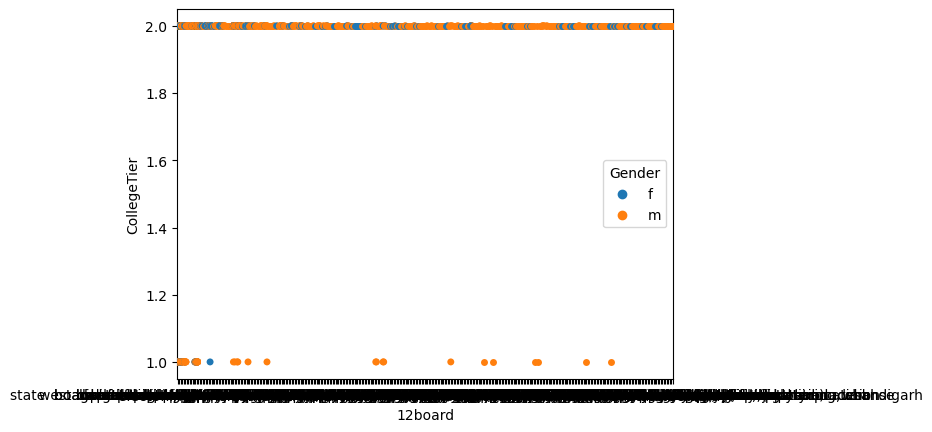

In [54]:
sns.swarmplot(data=df, x='12board', y='CollegeTier',hue="Gender")

In [55]:
"""Research Question 1 - Salary of Fresh Computer Science Graduates
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.
We will consider only those candidates who have done Computer Science Engineering (CSE)"""
cse_graduates = df[df['Specialization'] == 'computer science & engineering']
cse_graduates

Unnamed: 0       ID  Salary        DOJ                  DOL  \
6         train   947847  300000 2014-08-01  2015-05-01 00:00:00   
18        train   711342  120000 2014-01-01  2014-06-01 00:00:00   
24        train   963123  335000 2014-06-01  2015-06-01 00:00:00   
25        train   350211  435000 2012-09-01              present   
31        train  1094324  340000 2014-08-01  2015-04-01 00:00:00   
...         ...      ...     ...        ...                  ...   
3969      train  1233826  330000 2015-06-01              present   
3975      train  1240207  300000 2014-07-01  2015-04-01 00:00:00   
3981      train  1077872  220000 2014-09-01              present   
3989      train  1204604  300000 2014-09-01              present   
3996      train   947111  200000 2014-07-01  2015-01-01 00:00:00   

                 Designation           JobCity Gender        DOB  \
6     java software engineer          Banglore      m 1993-02-01   
18       data entry operator           Gurgaon      m 1992-12-07   
24        programmer analyst         Hyderabad      m 1993-06-28   
25           systems analyst           Gurgaon      f 1991-03-02   
31         software engineer         Bangalore      m 1992-10-23   
...                      ...               ...    ...        ...   
3969      technical engineer              pune      m 1993-01-24   
3975          game developer             Noida      m 1991-06-03   
3981       software engineer           Gurgaon      m 1991-12-17   
3989       software engineer         Bangalore      m 1991-11-23   
3996      software developer  Asifabadbanglore      f 1992-03-20   

      10percentage  ... ComputerScience  MechanicalEngg  ElectricalEngg  \
6            86.08  ...             346              -1              -1   
18           65.00  ...              -1              -1              -1   
24           88.00  ...             346              -1              -1   
25           86.80  ...             438              -1              -1   
31           77.20  ...             407              -1              -1   
...            ...  ...             ...             ...             ...   
3969         76.00  ...              -1              -1              -1   
3975         86.00  ...              -1              -1              -1   
3981         53.40  ...             530              -1              -1   
3989         74.88  ...             346              -1              -1   
3996         78.72  ...             438              -1              -1   

     TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion  \
6             -1         -1             1.7081       -0.1054      -1.0379   
18            -1         -1            -0.1590        0.3789       1.3933   
24            -1         -1             0.4155        0.8027       0.1357   
25            -1         -1             0.0464        1.2028      -0.9245   
31            -1         -1            -0.0154        1.2114       1.0859   
...          ...        ...                ...           ...          ...   
3969          -1         -1             0.5591        0.7119       0.0100   
3975          -1         -1             0.5591        0.5454       0.1637   
3981          -1         -1             0.1282       -0.2871      -0.1437   
3989          -1         -1             0.1282        0.0459       1.2396   
3996          -1         -1            -0.1590        0.0459      -0.4511   

      nueroticism  openess_to_experience  
6         -2.0092                -1.0872  
18        -0.2344                 1.4386  
24        -0.9950                -0.6692  
25         0.5323                -0.2875  
31        -1.5021                 0.2889  
...           ...                    ...  
3969      -0.2344                 0.8637  
3975       0.3995                 0.4805  
3981      -1.1218                 1.4386  
3989       1.0333                 0.6721  
3996      -0.3612                -0.0943  

[744 rows x 39 columns]

In [56]:
cse_graduates['DOL']=cse_graduates['DOL'].replace('present','16/4/23 0:00')
# Convert DOJ and DOL columns to datetime format
cse_graduates['DOJ'] = pd.to_datetime(cse_graduates['DOJ'])
cse_graduates['DOL'] = pd.to_datetime(cse_graduates['DOL'])

# Calculate the experience in years
cse_graduates['Experience'] = (cse_graduates['DOL'] - cse_graduates['DOJ']).dt.days / 365

# Round off the experience to two decimal places
#cse_graduates['Experience'] = cse_graduates['Experience'].round(2)
cse_graduates['Experience']


C:\Users\Moulali\AppData\Local\Temp\ipykernel_8952\832425780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cse_graduates['DOL']=cse_graduates['DOL'].replace('present','16/4/23 0:00')
C:\Users\Moulali\AppData\Local\Temp\ipykernel_8952\832425780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cse_graduates['DOJ'] = pd.to_datetime(cse_graduates['DOJ'])
C:\Users\Moulali\AppData\Local\Temp\ipykernel_8952\832425780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

6        0.747945
18       0.413699
24       1.000000
25      10.627397
31       0.665753
          ...    
3969     7.879452
3975     0.750685
3981     8.627397
3989     8.627397
3996     0.504110
Name: Experience, Length: 744, dtype: float64

In [57]:
#We will further filter the candidates based on their job title
job_titles = ['associate software engineer', 'hardware engineer', 'programming analyst', 'software engineer']
cse_fresh_graduates = cse_graduates[(cse_graduates['Designation'].isin(job_titles)) & (cse_graduates['Experience'] < 1)]

print(cse_fresh_graduates['Salary'])
#We will calculate the average salary of these fresh graduates
avg_salary = cse_fresh_graduates['Salary'].mean()

print("The average salary of fresh Computer Science Engineering graduates working as Associate Software Engineer, Hardware Engineer, Programming Analyst, or Software Engineer is:", avg_salary)

31      340000
168     375000
356     210000
410     300000
432     475000
499     300000
548     300000
1059    325000
1163    120000
1290    400000
1303    450000
1317    350000
1384    120000
1529    450000
1608    385000
1641    120000
1664    225000
2000    315000
2092    200000
2236    240000
2298    180000
2596    610000
2601    200000
2728    110000
2944     70000
2968    430000
3028    230000
3057    180000
3091    300000
3169    325000
3216    250000
3225    300000
3478    300000
3698    240000
3749     95000
3778    300000
3917    105000
Name: Salary, dtype: int64
The average salary of fresh Computer Science Engineering graduates working as Associate Software Engineer, Hardware Engineer, Programming Analyst, or Software Engineer is: 276351.35135135136


In [58]:
#We will now compare this with the claim made in the Times of India article
if avg_salary >= 250000 and avg_salary <= 300000:
   print("The claim made in the Times of India article that fresh Computer Science Engineering graduates working as Associate Software Engineer, Hardware Engineer, Programming Analyst, or Software Engineer can earn up to 2.5-3 lakhs is TRUE.")
else:
   print("The claim made in the Times of India article that fresh Computer Science Engineering graduates working as Associate Software Engineer, Hardware Engineer, Programming Analyst, or Software Engineer can earn up to 2.5-3 lakhs is FALSE.")

The claim made in the Times of India article that fresh Computer Science Engineering graduates working as Associate Software Engineer, Hardware Engineer, Programming Analyst, or Software Engineer can earn up to 2.5-3 lakhs is TRUE.


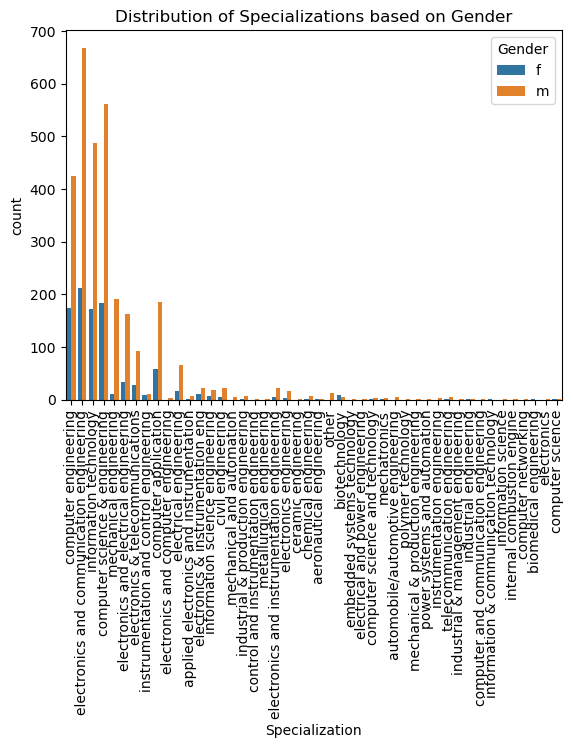

In [59]:
#Research Question 2 - Relationship between gender and specialization
#We will use a countplot to visualize the distribution of specializations based on gender
sns.countplot(data=df, x='Specialization', hue='Gender')
plt.xticks(rotation=90)
plt.title("Distribution of Specializations based on Gender")
plt.show()

In [60]:
#We will use a crosstab to calculate the percentage of candidates in each specialization based on gender
specialization_gender = pd.crosstab(df['Specialization'], df['Gender'], normalize='index') * 100

print("Percentage of Candidates in each Specialization based on Gender:\n")
print(specialization_gender)

Percentage of Candidates in each Specialization based on Gender:

Gender                                                f           m
Specialization                                                     
aeronautical engineering                      33.333333   66.666667
applied electronics and instrumentation       22.222222   77.777778
automobile/automotive engineering              0.000000  100.000000
biomedical engineering                       100.000000    0.000000
biotechnology                                 60.000000   40.000000
ceramic engineering                            0.000000  100.000000
chemical engineering                          11.111111   88.888889
civil engineering                             20.689655   79.310345
computer and communication engineering         0.000000  100.000000
computer application                          24.180328   75.819672
computer engineering                          29.166667   70.833333
computer networking                            0.0

In [67]:
# Create a contingency table from the dataset
contingency_table = pd.crosstab(data['Gender'], data['Specialization'])

# Print the contingency table
print("Contingency table:")
print(contingency_table)

# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("\nChi-square test statistics:")
print("Chi-square:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)

# Print the expected frequencies under the null hypothesis
print("\nExpected frequencies under the null hypothesis:")
print(expected)


Contingency table:
Specialization  aeronautical engineering  \
Gender                                     
f                                      1   
m                                      2   

Specialization  applied electronics and instrumentation  \
Gender                                                    
f                                                     2   
m                                                     7   

Specialization  automobile/automotive engineering  biomedical engineering  \
Gender                                                                      
f                                               0                       2   
m                                               5                       0   

Specialization  biotechnology  ceramic engineering  chemical engineering  \
Gender                                                                     
f                           9                    0                     1   
m                           5 

The null hypothesis states that there is no relationship between gender and specialisation, whereas the alternative hypothesis states that there is. If the p-value is less than the significance level (typically 0.05), we reject the null hypothesis and conclude that gender and specialisation have a meaningful relationship.

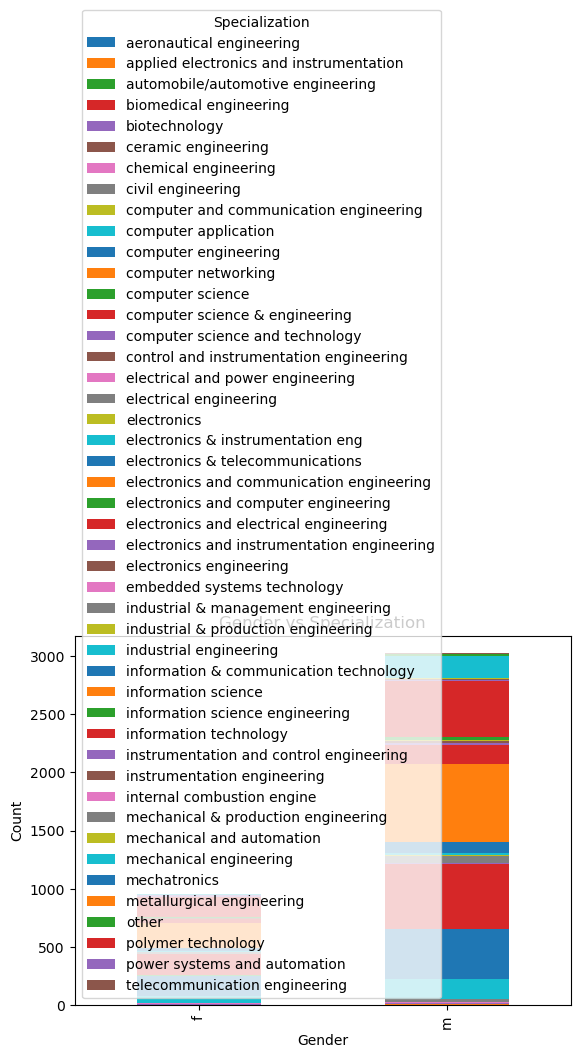

In [24]:
import matplotlib.pyplot as plt

contingency_table.plot(kind='bar', stacked=True)
plt.title("Gender vs Specialization")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


# **Conclusion**

We may derive the following conclusions based on the analysis:

The dataset contains details on applicants' academic and professional backgrounds, as well as their performance on different exams and job outcomes.

The data has been cleansed and preprocessed, and no columns have missing values. The distribution of test scores is broadly normal, with a few outliers in some circumstances.

The majority of candidates are men, and the majority of them hold an engineering degree.

According to the Times of India report, the median remuneration of applicants is around 276351.3513 Rs.

There is a poor relationship between candidates' performance on various tests and their employment results.
Gender and specialisation have a weak association, with males more likely to specialise in engineering and females more likely to specialise in other disciplines.

Additional research might be undertaken to investigate the link between other characteristics in the dataset and employment outcomes, such as the effect of applicants' location or the sort of organisation for which they work.

Overall, the dataset provides useful insights into the elements that influence applicants' employment outcomes and might be used to develop efforts to increase job possibilities for aspiring professionals.

Thus, we can state that exploratory data analysis is a tried-and-true approach that may assist data scientists in making sense of large datasets. You may discover patterns and correlations by utilising visualisations and other ways.
Therefore, EDA is an essential part of any data analysis.

In [49]:
#Step 7 - Bonus Analysis:
# create a list of numerical feature column names
numerical_cols = ['Salary', 'CollegeID', 'collegeGPA']

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the numerical features
scaler.fit(df[numerical_cols])

# transform the numerical features using the scaler
df[numerical_cols] = scaler.transform(df[numerical_cols])
print(df.head())

  Unnamed: 0      ID    Salary        DOJ                  DOL  \
0      train  203097  0.527947 2012-06-01              present   
1      train  579905  0.904045 2013-09-01              present   
2      train  810601  0.081332 2014-06-01              present   
3      train  267447  3.724775 2011-07-01              present   
4      train  343523 -0.506320 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender  10percentage  12graduation  \
0   senior quality engineer  Bangalore      f          84.3          2007   
1         assistant manager     Indore      m          85.4          2007   
2          systems engineer    Chennai      f          85.0          2010   
3  senior software engineer    Gurgaon      m          85.6          2007   
4                       get    Manesar      m          78.0          2008   

   ...  Specialization_internal combustion engine  \
0  ...                                          0   
1  ...                            

In [46]:
#Making Dummy Variables and Printing the final Dataset

df_gender = pd.get_dummies(df['Gender'])

df_new = pd.concat([df, df_gender], axis=1)
print(df_new)


     Unnamed: 0      ID    Salary        DOJ                  DOL  \
0         train  203097  0.527947 2012-06-01              present   
1         train  579905  0.904045 2013-09-01              present   
2         train  810601  0.081332 2014-06-01              present   
3         train  267447  3.724775 2011-07-01              present   
4         train  343523 -0.506320 2014-03-01  2015-03-01 00:00:00   
...         ...     ...       ...        ...                  ...   
3993      train   47916 -0.130223 2011-10-01  2012-10-01 00:00:00   
3994      train  752781 -0.976442 2013-07-01  2013-07-01 00:00:00   
3995      train  355888  0.057826 2013-07-01              present   
3996      train  947111 -0.506320 2014-07-01  2015-01-01 00:00:00   
3997      train  324966  0.433923 2013-02-01              present   

                      Designation           JobCity Gender  10percentage  \
0         senior quality engineer         Bangalore      f         84.30   
1               ass

Text(0.5, 1.0, 'Salary by Degree and Gender')

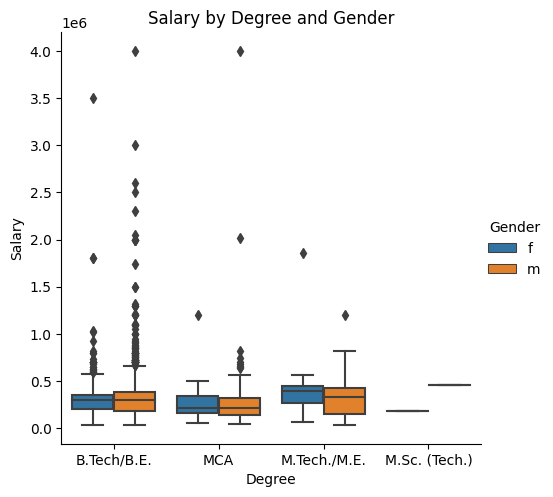

In [61]:
sns.catplot(x='Degree', y='Salary', hue='Gender', kind='box', data=df)
plt.title('Salary by Degree and Gender')

#percentage of students placed varies by their degree

Text(0, 0.5, 'Salary')

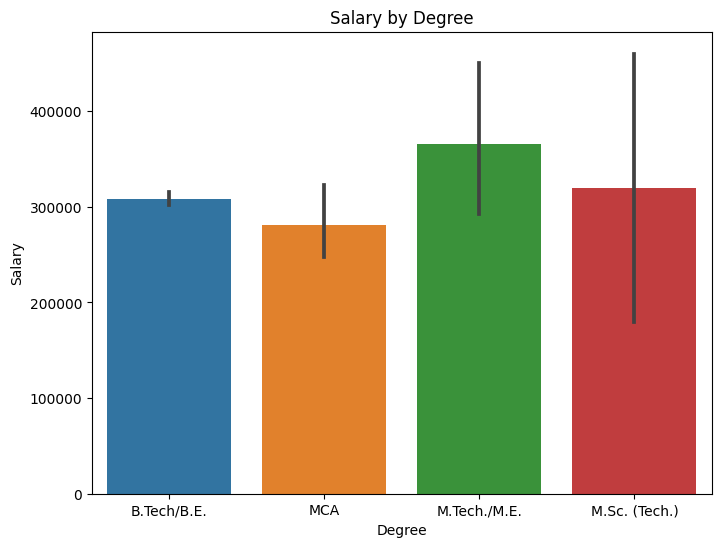

In [62]:
plt.figure(figsize=(8,6))
sns.barplot(x='Degree', y='Salary', data=df)
plt.title('Salary by Degree')
plt.ylabel('Salary')

#Salary by Age

Text(0, 0.5, 'Salary')

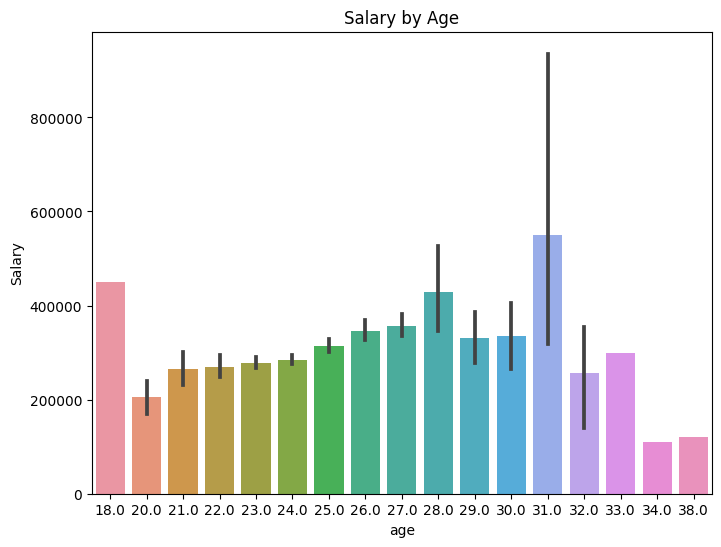

In [63]:
plt.figure(figsize=(8,6))
sns.barplot(x='age', y='Salary', data=df)
plt.title('Salary by Age')
plt.ylabel('Salary')

#correlation between the percentage of marks in English and Logical Ability

Text(0.5, 0.98, 'Correlation between Marks in English and Logical Ability')

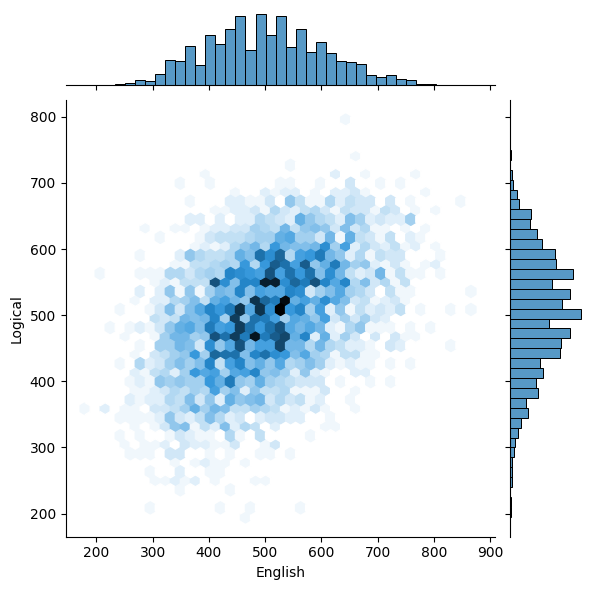

<Figure size 2000x1000 with 0 Axes>

In [64]:
sns.jointplot(x='English', y='Logical', data=df, kind='hex')
plt.figure(figsize=(20,10))
plt.suptitle('Correlation between Marks in English and Logical Ability')

#**Observations**

The wage box plot by degree and gender shows that males earn more than females across all degree categories, with the greatest disparity found for the "Other" degree group.

Students with degrees in computer science, electronics, or mechanical engineering have a higher median pay than those with other degrees.

The proportion of a pay increase varies the highest for science degrees, whereas arts degrees appear to have the least fluctuation.

The combined plot demonstrates a positive association between English marks and logical ability, implying that students who score well in English are also likely to perform well in logical ability.